## multiple sma based strategy

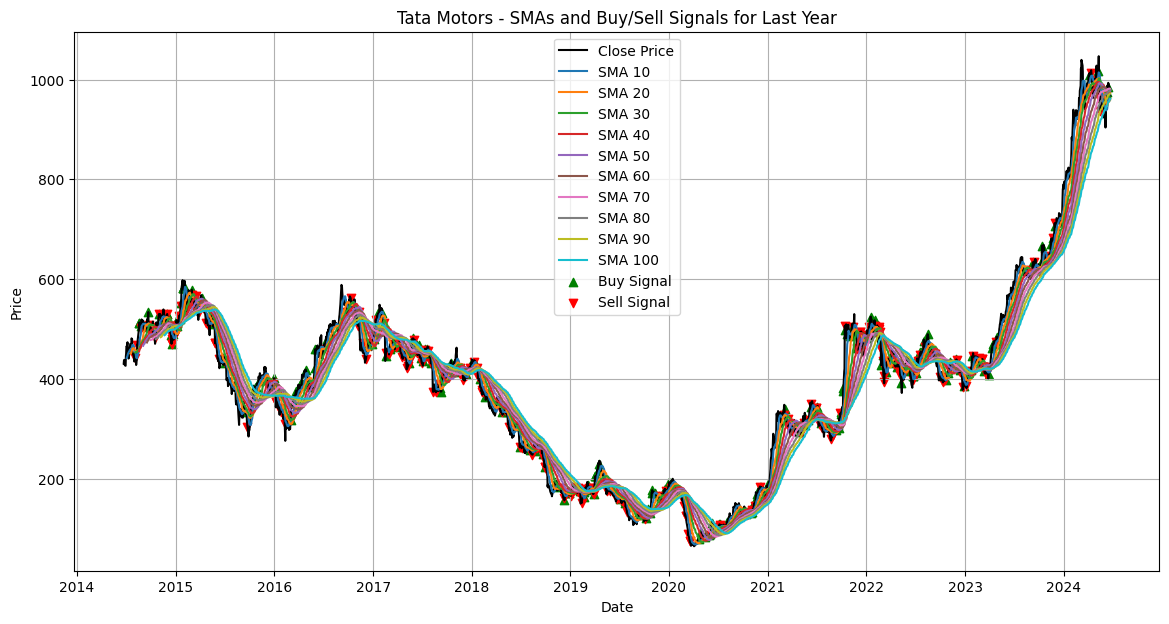

Total Return: 726.41%
final capital =  826408.0813390041


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("TATAMOTORS.NS2.csv")

# Remove rows with NaN values in 'Open' or 'Close' columns
df = df.dropna(subset=['Open', 'Close'])

# Prepare data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Filter data for the last year (assuming the data is ordered and has daily entries)
data = df[['Open', 'Close']]
last_date = data.index[-1]
one_year_ago = last_date - pd.DateOffset(years=10)
data = data[data.index >= one_year_ago]

# Calculate multiple SMAs
sma_periods = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for period in sma_periods:
    data[f'SMA_{period}'] = data['Close'].rolling(window=period).mean()

# Identify buy and sell signals
buy_signals = []
sell_signals = []

for i in range(1, len(data)):
    for j in range(len(sma_periods) - 1):
        short_sma = f'SMA_{sma_periods[j]}'
        long_sma = f'SMA_{sma_periods[j + 1]}'
        
        if data[short_sma].iloc[i] > data[long_sma].iloc[i] and data[short_sma].iloc[i - 1] <= data[long_sma].iloc[i - 1]:
            buy_signals.append((data.index[i], data['Close'].iloc[i]))
        elif data[short_sma].iloc[i] < data[long_sma].iloc[i] and data[short_sma].iloc[i - 1] >= data[long_sma].iloc[i - 1]:
            sell_signals.append((data.index[i], data['Close'].iloc[i]))

# Ensure the signals are in pairs
if len(buy_signals) > len(sell_signals):
    buy_signals = buy_signals[:len(sell_signals)]
elif len(sell_signals) > len(buy_signals):
    sell_signals = sell_signals[:len(buy_signals)]

# Calculate returns based on the initial capital
initial_capital = 100000
returns = []
capital_over_time = []

for i in range(len(buy_signals)):
    buy_price = buy_signals[i][1]
    sell_price = sell_signals[i][1]
    trade_return = (sell_price - buy_price) / buy_price
    returns.append(trade_return)
    initial_capital *= (1 + trade_return)
    capital_over_time.append(initial_capital)

# Aggregate total return
total_return = capital_over_time[-1] - 100000

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='black')

# Plot SMAs
for period in sma_periods:
    plt.plot(data[f'SMA_{period}'], label=f'SMA {period}')

# Plot buy and sell signals
buy_dates, buy_prices = zip(*buy_signals)
sell_dates, sell_prices = zip(*sell_signals)

plt.scatter(buy_dates, buy_prices, marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_dates, sell_prices, marker='v', color='red', label='Sell Signal', alpha=1)

plt.title('Tata Motors - SMAs and Buy/Sell Signals for Last Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Print total return
total_return_percentage = (total_return / 100000) * 100
print(f'Total Return: {total_return_percentage:.2f}%')
print("final capital = ",capital_over_time[-1])


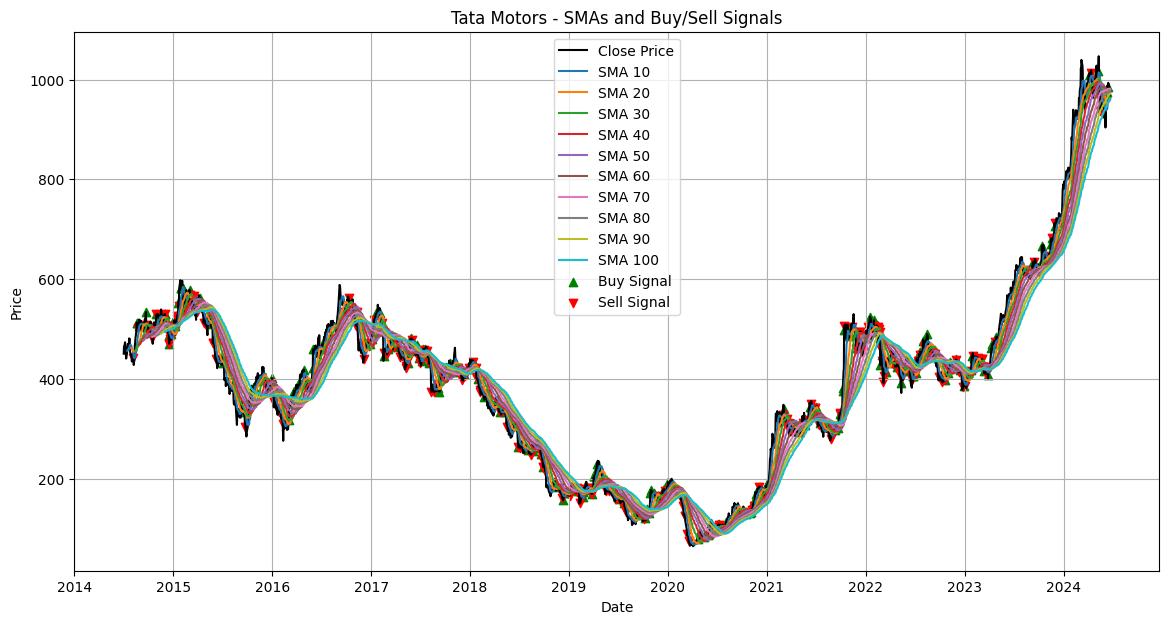

Total Return: 663.83%


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("TATAMOTORS.NS2.csv")

# Remove rows with NaN values in 'Open' or 'Close' columns
df = df.dropna(subset=['Open', 'Close'])

# Prepare data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Open', 'Close']]
data=data[6000:]

# Calculate multiple SMAs
sma_periods = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for period in sma_periods:
    data[f'SMA_{period}'] = data['Close'].rolling(window=period).mean()

# Identify buy and sell signals
buy_signals = []
sell_signals = []

for i in range(1, len(data)):
    for j in range(len(sma_periods)-1):
        short_sma = f'SMA_{sma_periods[j]}'
        long_sma = f'SMA_{sma_periods[j+1]}'
        
        if data[short_sma].iloc[i] > data[long_sma].iloc[i] and data[short_sma].iloc[i-1] <= data[long_sma].iloc[i-1]:
            buy_signals.append((data.index[i], data['Close'].iloc[i]))
        elif data[short_sma].iloc[i] < data[long_sma].iloc[i] and data[short_sma].iloc[i-1] >= data[long_sma].iloc[i-1]:
            sell_signals.append((data.index[i], data['Close'].iloc[i]))

# Ensure the signals are in pairs
if len(buy_signals) > len(sell_signals):
    buy_signals = buy_signals[:len(sell_signals)]
elif len(sell_signals) > len(buy_signals):
    sell_signals = sell_signals[:len(buy_signals)]

# Calculate returns
returns = []
for i in range(len(buy_signals)):
    buy_price = buy_signals[i][1]
    sell_price = sell_signals[i][1]
    returns.append((sell_price - buy_price) / buy_price)

# Aggregate returns
total_return = sum(returns)

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='black')

# Plot SMAs
for period in sma_periods:
    plt.plot(data[f'SMA_{period}'], label=f'SMA {period}')

# Plot buy and sell signals
buy_dates, buy_prices = zip(*buy_signals)
sell_dates, sell_prices = zip(*sell_signals)

plt.scatter(buy_dates, buy_prices, marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_dates, sell_prices, marker='v', color='red', label='Sell Signal', alpha=1)

plt.title('Tata Motors - SMAs and Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Print total return
print(f'Total Return: {total_return * 100:.2f}%')


## using two sma 

C:\Users\iamha\AppData\Local\Temp\ipykernel_23800\747190106.py:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(


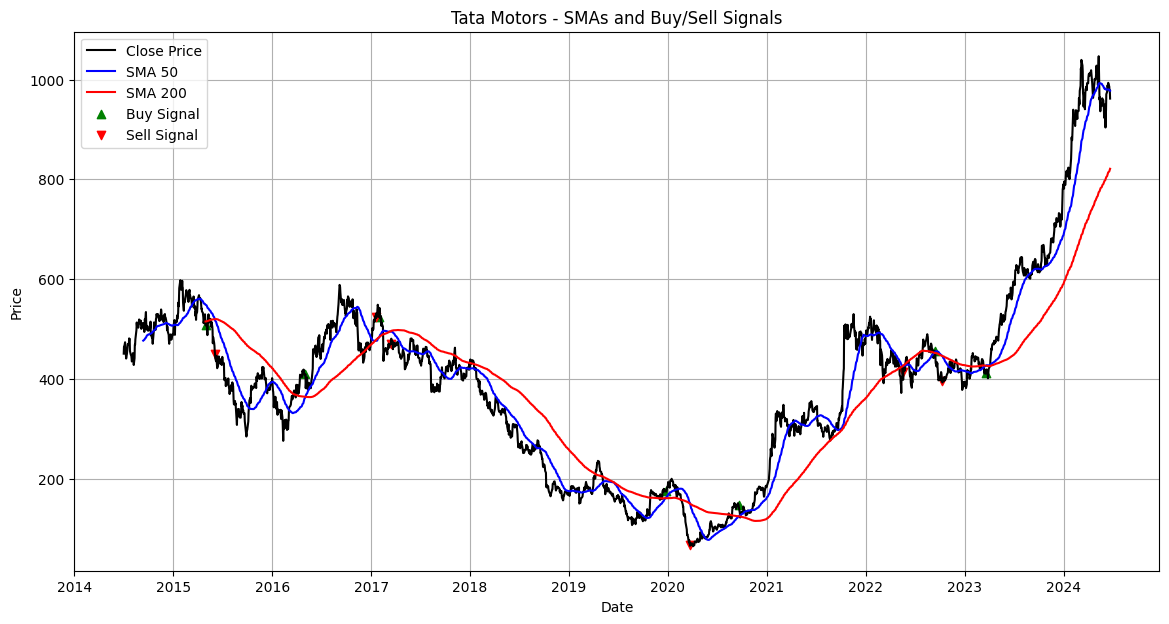

Initial Capital: 100000
Final Value: 225368.56642800002
Total Return: 125.37%
Total Profit: 125368.57


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("TATAMOTORS.NS2.csv")

# Remove rows with NaN values in 'Open' or 'Close' columns
df = df.dropna(subset=['Open', 'Close'])

# Prepare data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Open', 'Close']]
data =data[6000:]

# Calculate SMAs
short_window = 50  # Short-term SMA period
long_window = 200  # Long-term SMA period
data['SMA_short'] = data['Close'].rolling(window=short_window).mean()
data['SMA_long'] = data['Close'].rolling(window=long_window).mean()

# Identify buy and sell signals
signals = pd.DataFrame(index=data.index)
signals['signal'] = 0

# Generate buy and sell signals
signals['signal'][short_window:] = np.where(
    data['SMA_short'][short_window:] > data['SMA_long'][short_window:], 1, 0)
signals['positions'] = signals['signal'].diff()

# Calculate returns
initial_capital = 100000  # Initial capital in currency (e.g., INR)
capital = initial_capital
positions = 0  # Initial number of shares
long_positions = []
short_positions = []
total_profit = 0

for i in range(1, len(signals)):
    if signals['positions'].iloc[i] == 1:  # Buy signal
        buy_price = data['Close'].iloc[i]
        shares = capital // buy_price
        capital -= shares * buy_price
        positions += shares
        long_positions.append((data.index[i], buy_price))
        
    elif signals['positions'].iloc[i] == -1 and positions > 0:  # Sell signal
        sell_price = data['Close'].iloc[i]
        capital += positions * sell_price
        profit = positions * (sell_price - buy_price)
        total_profit += profit
        positions = 0
        short_positions.append((data.index[i], sell_price))

# Calculate final return
final_value = capital + positions * data['Close'].iloc[-1]
total_return = (final_value - initial_capital) / initial_capital
total_profit = final_value - initial_capital

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='black')
plt.plot(data['SMA_short'], label=f'SMA {short_window}', color='blue')
plt.plot(data['SMA_long'], label=f'SMA {long_window}', color='red')

# Plot buy and sell signals
buy_dates, buy_prices = zip(*long_positions) if long_positions else ([], [])
sell_dates, sell_prices = zip(*short_positions) if short_positions else ([], [])

plt.scatter(buy_dates, buy_prices, marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_dates, sell_prices, marker='v', color='red', label='Sell Signal', alpha=1)

plt.title('Tata Motors - SMAs and Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Print total capital, return, and profit
print(f'Initial Capital: {initial_capital}')
print(f'Final Value: {final_value}')
print(f'Total Return: {total_return * 100:.2f}%')
print(f'Total Profit: {total_profit:.2f}')


## ema based 

C:\Users\iamha\AppData\Local\Temp\ipykernel_23800\3544717571.py:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(


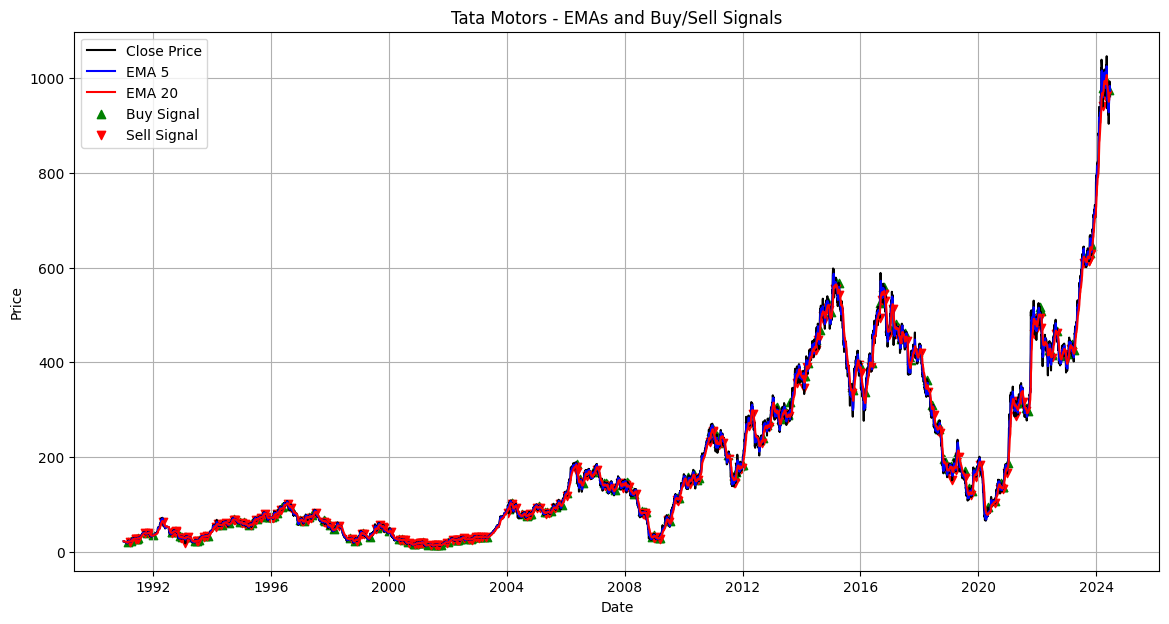

Initial Capital: 100000
Final Value: 26487728.786519
Total Return: 26387.73%
Total Profit: 26387728.79


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("TATAMOTORS.NS2.csv")

# Remove rows with NaN values in 'Open' or 'Close' columns
df = df.dropna(subset=['Open', 'Close'])

# Prepare data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Open', 'Close']]
data = data[:]

# Calculate EMAs
short_window = 5  # Short-term EMA period
long_window = 20  # Long-term EMA period
data['EMA_short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
data['EMA_long'] = data['Close'].ewm(span=long_window, adjust=False).mean()

# Identify buy and sell signals
signals = pd.DataFrame(index=data.index)
signals['signal'] = 0

# Generate buy and sell signals
signals['signal'][short_window:] = np.where(
    data['EMA_short'][short_window:] > data['EMA_long'][short_window:], 1, 0)
signals['positions'] = signals['signal'].diff()

# Initialize trading parameters
initial_capital = 100000  # Initial capital in currency (e.g., INR)
capital = initial_capital
positions = 0  # Initial number of shares
long_positions = []
short_positions = []
total_profit = 0

# Implement trading strategy
for i in range(1, len(signals)):
    if signals['positions'].iloc[i] == 1:  # Buy signal
        buy_price = data['Close'].iloc[i]
        shares = capital // buy_price
        capital -= shares * buy_price
        positions += shares
        long_positions.append((data.index[i], buy_price))
        
    elif signals['positions'].iloc[i] == -1 and positions > 0:  # Sell signal
        sell_price = data['Close'].iloc[i]
        capital += positions * sell_price
        profit = positions * (sell_price - buy_price)
        total_profit += profit
        positions = 0
        short_positions.append((data.index[i], sell_price))

# Calculate final return
final_value = capital + positions * data['Close'].iloc[-1]
total_return = (final_value - initial_capital) / initial_capital
total_profit = final_value - initial_capital

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='black')
plt.plot(data['EMA_short'], label=f'EMA {short_window}', color='blue')
plt.plot(data['EMA_long'], label=f'EMA {long_window}', color='red')

# Plot buy and sell signals
buy_dates, buy_prices = zip(*long_positions) if long_positions else ([], [])
sell_dates, sell_prices = zip(*short_positions) if short_positions else ([], [])

plt.scatter(buy_dates, buy_prices, marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_dates, sell_prices, marker='v', color='red', label='Sell Signal', alpha=1)

plt.title('Tata Motors - EMAs and Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Print total capital, return, and profit
print(f'Initial Capital: {initial_capital}')
print(f'Final Value: {final_value}')
print(f'Total Return: {total_return * 100:.2f}%')
print(f'Total Profit: {total_profit:.2f}')


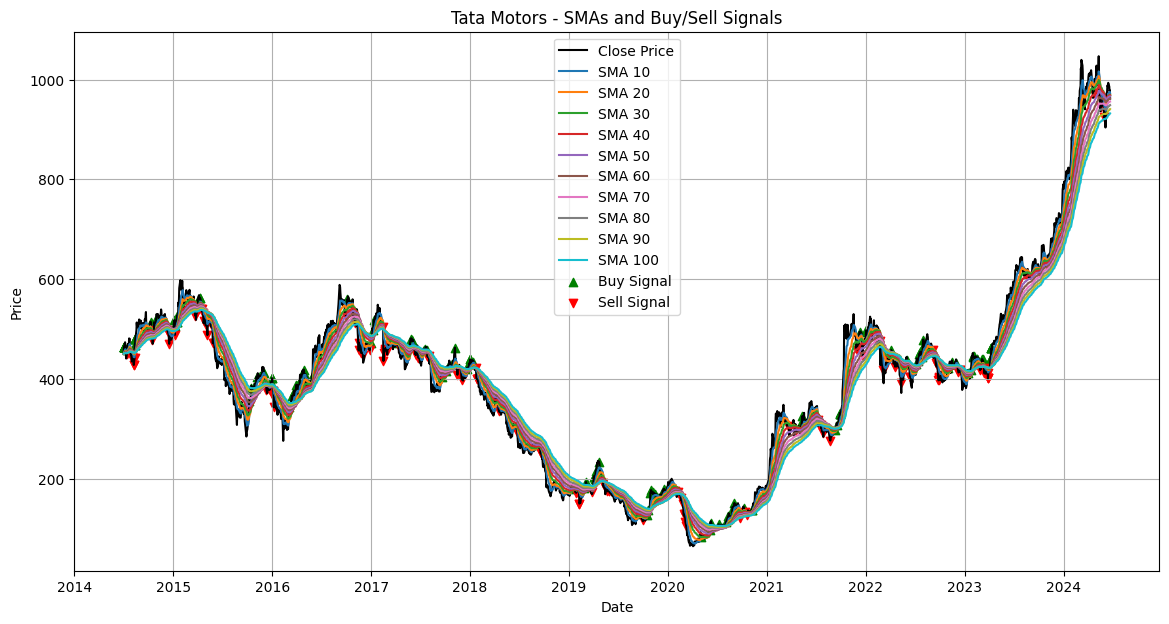

Total Return: 1731.49%


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("TATAMOTORS.NS2.csv")

# Remove rows with NaN values in 'Open' or 'Close' columns
df = df.dropna(subset=['Open', 'Close'])

# Prepare data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Open', 'Close']]
data=data[6000:]

# Calculate multiple SMAs
sma_periods = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for period in sma_periods:
    data[f'SMA_{period}'] = data['Close'].ewm(span=period, adjust=False).mean()

# Identify buy and sell signals
buy_signals = []
sell_signals = []

for i in range(1, len(data)):
    for j in range(len(sma_periods)-1):
        short_sma = f'SMA_{sma_periods[j]}'
        long_sma = f'SMA_{sma_periods[j+1]}'
        
        if data[short_sma].iloc[i] > data[long_sma].iloc[i] and data[short_sma].iloc[i-1] <= data[long_sma].iloc[i-1]:
            buy_signals.append((data.index[i], data['Close'].iloc[i]))
        elif data[short_sma].iloc[i] < data[long_sma].iloc[i] and data[short_sma].iloc[i-1] >= data[long_sma].iloc[i-1]:
            sell_signals.append((data.index[i], data['Close'].iloc[i]))

# Ensure the signals are in pairs
if len(buy_signals) > len(sell_signals):
    buy_signals = buy_signals[:len(sell_signals)]
elif len(sell_signals) > len(buy_signals):
    sell_signals = sell_signals[:len(buy_signals)]

# Calculate returns
returns = []
for i in range(len(buy_signals)):
    buy_price = buy_signals[i][1]
    sell_price = sell_signals[i][1]
    returns.append((sell_price - buy_price) / buy_price)

# Aggregate returns
total_return = sum(returns)

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='black')

# Plot SMAs
for period in sma_periods:
    plt.plot(data[f'SMA_{period}'], label=f'SMA {period}')

# Plot buy and sell signals
buy_dates, buy_prices = zip(*buy_signals)
sell_dates, sell_prices = zip(*sell_signals)

plt.scatter(buy_dates, buy_prices, marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_dates, sell_prices, marker='v', color='red', label='Sell Signal', alpha=1)

plt.title('Tata Motors - SMAs and Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Print total return
print(f'Total Return: {total_return * 100:.2f}%')


download stock data from yfinance from particular date to date

In [29]:
import yfinance as yf

# Get data for Tata Motors
symbol = 'TATAMOTORS.NS'
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

print(data)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  493.500000  500.850006  492.000000  497.600006  494.527893   
2022-01-04  496.799988  499.000000  484.049988  489.600006  486.577271   
2022-01-05  486.950012  492.750000  483.549988  489.750000  486.726349   
2022-01-06  481.500000  492.950012  477.100006  488.850006  485.831909   
2022-01-07  490.049988  495.500000  483.750000  490.600006  487.571075   
...                ...         ...         ...         ...         ...   
2022-12-26  380.250000  390.700012  375.200012  384.799988  382.424286   
2022-12-27  390.000000  397.450012  388.500000  394.149994  391.716553   
2022-12-28  394.000000  395.899994  390.399994  391.299988  388.884155   
2022-12-29  389.000000  390.000000  383.049988  385.899994  383.517487   
2022-12-30  391.000000  392.200012  387.000000  387.950012  385.554840   

              Volume  
Date          

selelting less risky stocks

In [23]:
import yfinance as yf
import pandas as pd

# Define your thresholds
NSE_VOLUME_THRESHOLD = 100000  # Adjusted for NSE (lower than NYSE)
PRICE_THRESHOLD = 500  # We keep the price threshold same
VOLATILITY_INDEX_THRESHOLD = 0.02  # Example volatility threshold

# Load the list of all tradable companies on NSE
nse_symbols = pd.read_csv("EQUITY_L.csv")
nse_symbols = nse_symbols['SYMBOL'].tolist()

def calculate_volatility(prices):
    return max(prices) - min(prices)

def filter_stocks(symbols):
    selected_stocks = []
    for symbol in symbols:
        symbol = f'{symbol}.NS'  # Append the NSE suffix
        try:
            data = yf.download(symbol, start='2022-01-01', end='2023-01-01')
            if data.empty:
                continue

            volumes = data['Volume']
            closing_prices = data['Close']

            avg_volume = volumes.mean()
            avg_price = closing_prices.mean()
            volatility = calculate_volatility(closing_prices) / avg_price

            if avg_volume > NSE_VOLUME_THRESHOLD and avg_price > PRICE_THRESHOLD and volatility > VOLATILITY_INDEX_THRESHOLD:
                selected_stocks.append(symbol)
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
            continue

    return selected_stocks

if __name__ == "__main__":
    selected_stocks = filter_stocks(nse_symbols)
    print("Selected stocks and ETFs:", selected_stocks)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AADHARHFC.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1640975400, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*************

Selected stocks and ETFs: ['AARTIIND.NS', 'AAVAS.NS', 'ABB.NS', 'ACC.NS', 'ACI.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'AETHER.NS', 'AFFLE.NS', 'AJANTPHARM.NS', 'ALKEM.NS', 'AMIORG.NS', 'ANANDRATHI.NS', 'ANGELONE.NS', 'ANURAS.NS', 'APARINDS.NS', 'APCOTEXIND.NS', 'APLAPOLLO.NS', 'APLLTD.NS', 'APOLLOHOSP.NS', 'ASAHIINDIA.NS', 'ASIANPAINT.NS', 'ASTRAL.NS', 'ATGL.NS', 'AUBANK.NS', 'AUROPHARMA.NS', 'AVADHSUGAR.NS', 'AWL.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJELEC.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BALKRISIND.NS', 'BARBEQUE.NS', 'BATAINDIA.NS', 'BEML.NS', 'BERGEPAINT.NS', 'BESTAGRO.NS', 'BHARATFORG.NS', 'BHARTIARTL.NS', 'BIRLACORPN.NS', 'BLUESTARCO.NS', 'BORORENEW.NS', 'BRITANNIA.NS', 'BSE.NS', 'CAMS.NS', 'CANFINHOME.NS', 'CARBORUNIV.NS', 'CARERATING.NS', 'CARTRADE.NS', 'CARYSIL.NS', 'CDSL.NS', 'CEATLTD.NS', 'CENTURYPLY.NS', 'CENTURYTEX.NS', 'CGCL.NS', 'CHOLAFIN.NS', 'CHOLAHLDNG.NS', 'CIGNITITEC.NS', 'CIPLA.NS', 'CLEAN.NS', 'COFORGE.NS', 'COLPAL.NS', 'CONCOR.NS', 'CORO

In [24]:
print(len(selected_stocks))

255


In [27]:
import yfinance as yf
import pandas as pd

# Define your thresholds
NSE_VOLUME_THRESHOLD = 100000  # Adjusted for NSE (lower than NYSE)
PRICE_THRESHOLD = 500  # We keep the price threshold same


# Load the list of all tradable companies on NSE
nse_symbols = pd.read_csv("EQUITY_L.csv")
nse_symbols = nse_symbols['SYMBOL'].tolist()

def calculate_volatility(prices):
    return max(prices) - min(prices)

def filter_stocks(symbols):
    selected_stocks = []
    for symbol in symbols:
        symbol = f'{symbol}.NS'  # Append the NSE suffix
        try:
            data = yf.download(symbol, start='2022-01-01', end='2023-01-01')
            if data.empty:
                continue

            volumes = data['Volume']
            closing_prices = data['Close']

            avg_volume = volumes.mean()
            avg_price = closing_prices.mean()
            

            if avg_volume > NSE_VOLUME_THRESHOLD and avg_price > PRICE_THRESHOLD :
                selected_stocks.append(symbol)
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
            continue

    return selected_stocks

if __name__ == "__main__":
    selected_stocks = filter_stocks(nse_symbols)
    print("Selected stocks and ETFs:", selected_stocks)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AADHARHFC.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1640975400, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*************

Selected stocks and ETFs: ['AARTIIND.NS', 'AAVAS.NS', 'ABB.NS', 'ACC.NS', 'ACI.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'AETHER.NS', 'AFFLE.NS', 'AJANTPHARM.NS', 'ALKEM.NS', 'AMIORG.NS', 'ANANDRATHI.NS', 'ANGELONE.NS', 'ANURAS.NS', 'APARINDS.NS', 'APCOTEXIND.NS', 'APLAPOLLO.NS', 'APLLTD.NS', 'APOLLOHOSP.NS', 'ASAHIINDIA.NS', 'ASIANPAINT.NS', 'ASTRAL.NS', 'ATGL.NS', 'AUBANK.NS', 'AUROPHARMA.NS', 'AVADHSUGAR.NS', 'AWL.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJELEC.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BALKRISIND.NS', 'BARBEQUE.NS', 'BATAINDIA.NS', 'BEML.NS', 'BERGEPAINT.NS', 'BESTAGRO.NS', 'BHARATFORG.NS', 'BHARTIARTL.NS', 'BIRLACORPN.NS', 'BLUESTARCO.NS', 'BORORENEW.NS', 'BRITANNIA.NS', 'BSE.NS', 'CAMS.NS', 'CANFINHOME.NS', 'CARBORUNIV.NS', 'CARERATING.NS', 'CARTRADE.NS', 'CARYSIL.NS', 'CDSL.NS', 'CEATLTD.NS', 'CENTURYPLY.NS', 'CENTURYTEX.NS', 'CGCL.NS', 'CHOLAFIN.NS', 'CHOLAHLDNG.NS', 'CIGNITITEC.NS', 'CIPLA.NS', 'CLEAN.NS', 'COFORGE.NS', 'COLPAL.NS', 'CONCOR.NS', 'CORO

In [28]:
print(len(selected_stocks))

255


In [29]:
def fetch_stock_data(symbol):
    try:
        data = yf.download(symbol, start='2022-01-01', end='2023-01-01')
        if data.empty:
            raise ValueError(f"No data found for symbol: {symbol}")
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return pd.DataFrame()
data = fetch_stock_data(selected_stocks)

[*********************100%%**********************]  255 of 255 completed


# checking mean reverting stocks

In [30]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, timedelta

def fetch_stock_data(symbol):
    try:
        data = yf.download(symbol, start='2022-01-01', end='2023-01-01')
        if data.empty:
            raise ValueError(f"No data found for symbol: {symbol}")
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return pd.DataFrame()

def adf_test(timeseries):
    result = adfuller(timeseries)
    return result[1]  # Return the p-value

def check_mean_reversion(stock_list):
    mean_reverting_stocks = []
    for stock in stock_list:
        data = fetch_stock_data(stock)
        if data.empty:
            continue
        closing_prices = data['Close']
        if closing_prices.empty:
            continue
        p_value = adf_test(closing_prices)
        if p_value < 0.05:  # Typically, a p-value less than 0.05 indicates stationarity
            mean_reverting_stocks.append(stock)
    return mean_reverting_stocks

if __name__ == "__main__":
    
    mean_reverting_stocks = check_mean_reversion(selected_stocks)
    print("Selected stocks and ETFs:", selected_stocks)
    print("Mean-reverting stocks:", mean_reverting_stocks)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Selected stocks and ETFs: ['AARTIIND.NS', 'AAVAS.NS', 'ABB.NS', 'ACC.NS', 'ACI.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'AETHER.NS', 'AFFLE.NS', 'AJANTPHARM.NS', 'ALKEM.NS', 'AMIORG.NS', 'ANANDRATHI.NS', 'ANGELONE.NS', 'ANURAS.NS', 'APARINDS.NS', 'APCOTEXIND.NS', 'APLAPOLLO.NS', 'APLLTD.NS', 'APOLLOHOSP.NS', 'ASAHIINDIA.NS', 'ASIANPAINT.NS', 'ASTRAL.NS', 'ATGL.NS', 'AUBANK.NS', 'AUROPHARMA.NS', 'AVADHSUGAR.NS', 'AWL.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJELEC.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BALKRISIND.NS', 'BARBEQUE.NS', 'BATAINDIA.NS', 'BEML.NS', 'BERGEPAINT.NS', 'BESTAGRO.NS', 'BHARATFORG.NS', 'BHARTIARTL.NS', 'BIRLACORPN.NS', 'BLUESTARCO.NS', 'BORORENEW.NS', 'BRITANNIA.NS', 'BSE.NS', 'CAMS.NS', 'CANFINHOME.NS', 'CARBORUNIV.NS', 'CARERATING.NS', 'CARTRADE.NS', 'CARYSIL.NS', 'CDSL.NS', 'CEATLTD.NS', 'CENTURYPLY.NS', 'CENTURYTEX.NS', 'CGCL.NS', 'CHOLAFIN.NS', 'CHOLAHLDNG.NS', 'CIGNITITEC.NS', 'CIPLA.NS', 'CLEAN.NS', 'COFORGE.NS', 'COLPAL.NS', 'CONCOR.NS', 'CORO

In [31]:
print("Mean-reverting stocks:", len(mean_reverting_stocks))

Mean-reverting stocks: 35


# mean reversion of stocks using bolinger band

In [39]:
import yfinance as yf
import pandas as pd
import numpy as np

# Function to fetch stock data
def fetch_stock_data(symbols, start_date='2022-01-01', end_date='2023-01-01'):
    all_data = {}
    for symbol in symbols:
        try:
            data = yf.download(f"{symbol}.NS", start=start_date, end=end_date)
            if data.empty:
                raise ValueError(f"No data found for symbol: {symbol}")
            all_data[symbol] = data
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
    
    return all_data

# Function to calculate moving average and standard deviation
def calculate_moving_average_std(stock_data, window=20):
    stock_data['mean'] = stock_data['Close'].rolling(window=window).mean()
    stock_data['std'] = stock_data['Close'].rolling(window=window).std()
    return stock_data

# Function to simulate mean reversion trades
def simulate_mean_reversion(stock_data, entry_threshold=1.0, exit_threshold=0.5, initial_capital=100000):
    capital = initial_capital
    positions = 0  # Initial number of shares
    trades = []
    total_profit = 0

    for date, row in stock_data.iterrows():
        if positions == 0:  # No current position
            if row['Close'] < (row['mean'] - entry_threshold * row['std']):  # Buy signal
                buy_price = row['Close']
                shares = capital // buy_price
                capital -= shares * buy_price
                positions += shares
                trades.append((date, 'BUY', buy_price, shares))
            elif row['Close'] > (row['mean'] + entry_threshold * row['std']):  # Sell signal
                sell_price = row['Close']
                shares = capital // sell_price
                capital += shares * sell_price
                positions -= shares
                trades.append((date, 'SELL', sell_price, shares))
        elif positions > 0:  # Long position
            if row['Close'] >= (row['mean'] - exit_threshold * row['std']):  # Exit long position
                sell_price = row['Close']
                capital += positions * sell_price
                profit = positions * (sell_price - buy_price)
                total_profit += profit
                positions = 0
                trades.append((date, 'SELL', sell_price, positions))
        elif positions < 0:  # Short position
            if row['Close'] <= (row['mean'] + exit_threshold * row['std']):  # Exit short position
                buy_price = row['Close']
                capital -= abs(positions) * buy_price
                profit = abs(positions) * (sell_price - buy_price)
                total_profit += profit
                positions = 0
                trades.append((date, 'BUY', buy_price, positions))

    # Final calculation for any remaining position
    if positions != 0:
        final_price = stock_data['Close'].iloc[-1]
        if positions > 0:
            capital += positions * final_price
            profit = positions * (final_price - buy_price)
        elif positions < 0:
            capital -= abs(positions) * final_price
            profit = abs(positions) * (sell_price - final_price)
        total_profit += profit

    final_value = capital
    total_return = (final_value - initial_capital) / initial_capital

    return trades, final_value, total_return, total_profit


data = fetch_stock_data(mean_reverting_stocks)

# Define thresholds
entry_threshold = 2.0
exit_threshold = 1.0

# Process each stock and simulate trades
results = {}
for stock in mean_reverting_stocks:
    stock_data = data[stock]
    stock_data = calculate_moving_average_std(stock_data)
    trades, final_value, total_return, total_profit = simulate_mean_reversion(stock_data, entry_threshold, exit_threshold)
    results[stock] = {
        'trades': trades,
        'final_value': final_value,
        'total_return': total_return,
        'total_profit': total_profit
    }

# Print results
for stock, result in results.items():
    print(f"Stock: {stock}")
    print(f"Trades: {result['trades']}")
    print(f"Final Value: {result['final_value']}")
    print(f"Total Return: {result['total_return'] * 100:.2f}%")
    print(f"Total Profit: {result['total_profit']:.2f}")
    print("\n")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Stock: RELIANCE
Trades: [(Timestamp('2022-02-24 00:00:00'), 'BUY', 2082.056396484375, 48.0), (Timestamp('2022-02-28 00:00:00'), 'SELL', 2177.86376953125, 0), (Timestamp('2022-03-07 00:00:00'), 'BUY', 2067.10400390625, 50.0), (Timestamp('2022-03-09 00:00:00'), 'SELL', 2172.83349609375, 0), (Timestamp('2022-03-22 00:00:00'), 'SELL', 2336.250732421875, 47.0), (Timestamp('2022-04-05 00:00:00'), 'BUY', 2423.84326171875, 0), (Timestamp('2022-04-20 00:00:00'), 'SELL', 2509.12841796875, 42.0), (Timestamp('2022-04-25 00:00:00'), 'BUY', 2487.484130859375, 0), (Timestamp('2022-06-03 00:00:00'), 'SELL', 2565.4775390625, 41.0), (Timestamp('2022-06-10 00:00:00'), 'BUY', 2505.251953125, 0), (Timestamp('2022-08-01 00:00:00'), 'SELL', 2376.585693359375, 45.0), (Timestamp('2022-08-05 00:00:00'), 'BUY', 2338.881103515625, 0), (Timestamp('2022-09-16 00:00:00'), 'BUY', 2306.7607421875, 48.0), (Timestamp('2022-10-04 00:00:00'), 'SELL', 2227.3828125, 0), (Timestamp('2022-10-31 00:00:00'), 'SELL', 2353.280029

## etf

In [2]:
import yfinance as yf
import pandas as pd

# Load the list of all tradable companies on NSE
nseetf_symbols = pd.read_csv("eq_etfseclist.csv", encoding='ISO-8859-1')
nse_symbols = nseetf_symbols['Symbol'].tolist()
# Add '.NS' to each symbol
nse_symbols = [symbol + '.NS' for symbol in nse_symbols]

print(nse_symbols[:10])


['NIFTYBEES.NS', 'JUNIORBEES.NS', 'LIQUIDBEES.NS', 'BANKBEES.NS', 'GOLDBEES.NS', 'GOLDSHARE.NS', 'GOLD1.NS', 'PSUBNKBEES.NS', 'PSUBANK.NS', 'QGOLDHALF.NS']


In [4]:
data = yf.download(nse_symbols, start='2022-01-01', end='2023-01-01')


[*********************100%%**********************]  210 of 210 completed

90 Failed downloads:
['EQUAL50ADD.NS', 'NAVINIFTY.NS', 'HDFCNIFBAN.NS', 'NEXT50IETF.NS', 'TOP100CASE.NS', 'HDFCGROWTH.NS', 'BANKNIFTY1.NS', 'EGOLD.NS', 'HDFCMID150.NS', 'HEALTHADD.NS', 'NV20.NS', 'IT.NS', 'LIQUIDBETF.NS', 'MIDQ50ADD.NS', 'COMMOIETF.NS', 'SILVERADD.NS', 'BSE500IETF.NS', 'NIF5GETF.NS', 'HDFCSML250.NS', 'HDFCGOLD.NS', 'NIFITETF.NS', 'MAKEINDIA.NS', 'HDFCBSE500.NS', 'NEXT50.NS', 'SENSEXADD.NS', 'LOWVOL1.NS', 'GOLDCASE.NS', 'BANKBETF.NS', 'MONIFTY500.NS', 'ABSLPSE.NS', 'GOLDETFADD.NS', 'MOM30IETF.NS', 'LIQUID.NS', 'HDFCSILVER.NS', 'PSUBANKADD.NS', 'GOLDETF.NS', 'ITIETF.NS', 'AXSENSEX.NS', 'ITETFADD.NS', 'MID150CASE.NS', 'BBNPPGOLD.NS', 'PVTBANKADD.NS', 'NIFTYBETF.NS', 'HDFCVALUE.NS', 'LIQUIDSBI.NS', 'NIF10GETF.NS', 'MIDCAPETF.NS', 'LIQUID1.NS', 'ABSLLIQUID.NS', 'LIQUIDIETF.NS', 'HEALTHIETF.NS', 'SENSEXETF.NS', 'LOWVOL.NS', 'ESG.NS', 'BFSI.NS', 'SILVRETF.NS', 'GSEC10YEAR.NS', 'HDFCPSUBK.NS', 'HDFCLIQUI

# getting mean reverting etfs

In [18]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from datetime import datetime, timedelta



def fetch_stock_data(symbol):
    try:
        data = yf.download(symbol, start='2015-01-01', end='2023-01-01')
        if data.empty:
            raise ValueError(f"No data found for symbol: {symbol}")
        return data
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return pd.DataFrame()





def adf_test(timeseries):
    result = adfuller(timeseries)
    return result[1]  # Return the p-value

def check_mean_reversion(stock_list):
    mean_reverting_stocks = []
    for stock in stock_list:
        data = fetch_stock_data(stock)
        if data.empty:
            continue
        closing_prices = data['Close']
        if closing_prices.empty:
            continue
        p_value = adf_test(closing_prices)
        if p_value < 0.05:  # Typically, a p-value less than 0.05 indicates stationarity
            mean_reverting_stocks.append(stock)
    return mean_reverting_stocks

if __name__ == "__main__":
    
    mean_reverting_stocks = check_mean_reversion(nse_symbols)
    print("Selected stocks and ETFs:", nse_symbols)
    print("Mean-reverting stocks:", mean_reverting_stocks)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Error fetching data for HDFCGOLD.NS: No data found for symbol: HDFCGOLD.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GOLDIETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for GOLDIETF.NS: No data found for symbol: GOLDIETF.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NIFTYIETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for NIFTYIETF.NS: No data found for symbol: NIFTYIETF.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SENSEXIETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for SENSEXIETF.NS: No data found for symbol: SENSEXIETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BANKNIFTY1.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for BANKNIFTY1.NS: No data found for symbol: BANKNIFTY1.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NV20.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for NV20.NS: No data found for symbol: NV20.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HDFCNIFTY.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed

Error fetching data for HDFCNIFTY.NS: No data found for symbol: HDFCNIFTY.NS



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BSE500IETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420

Error fetching data for BSE500IETF.NS: No data found for symbol: BSE500IETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NEXT50IETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for NEXT50IETF.NS: No data found for symbol: NEXT50IETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LIQUIDIETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for LIQUIDIETF.NS: No data found for symbol: LIQUIDIETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NIFTYETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for NIFTYETF.NS: No data found for symbol: NIFTYETF.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NEXT50.NS']:

Error fetching data for NEXT50.NS: No data found for symbol: NEXT50.NS



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ITIETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for ITIETF.NS: No data found for symbol: ITIETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HDFCNIFBAN.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed

Error fetching data for HDFCNIFBAN.NS: No data found for symbol: HDFCNIFBAN.NS



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ESG.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed


Error fetching data for ESG.NS: No data found for symbol: ESG.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['IT.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed


Error fetching data for IT.NS: No data found for symbol: IT.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HEALTHIETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for HEALTHIETF.NS: No data found for symbol: HEALTHIETF.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BFSI.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed


Error fetching data for BFSI.NS: No data found for symbol: BFSI.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['EQUAL50ADD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed


Error fetching data for EQUAL50ADD.NS: No data found for symbol: EQUAL50ADD.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ALPHA.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed

Error fetching data for ALPHA.NS: No data found for symbol: ALPHA.NS



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MIDQ50ADD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed


Error fetching data for MIDQ50ADD.NS: No data found for symbol: MIDQ50ADD.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MAKEINDIA.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed


Error fetching data for MAKEINDIA.NS: No data found for symbol: MAKEINDIA.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MIDCAP.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed

Error fetching data for MIDCAP.NS: No data found for symbol: MIDCAP.NS



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MIDCAPETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for MIDCAPETF.NS: No data found for symbol: MIDCAPETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LOWVOL1.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed


Error fetching data for LOWVOL1.NS: No data found for symbol: LOWVOL1.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MOM30IETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed


Error fetching data for MOM30IETF.NS: No data found for symbol: MOM30IETF.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['INFRAIETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for INFRAIETF.NS: No data found for symbol: INFRAIETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SILVERADD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for SILVERADD.NS: No data found for symbol: SILVERADD.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HDFCSILVER.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed


Error fetching data for HDFCSILVER.NS: No data found for symbol: HDFCSILVER.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HDFCVALUE.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for HDFCVALUE.NS: No data found for symbol: HDFCVALUE.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HDFCGROWTH.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for HDFCGROWTH.NS: No data found for symbol: HDFCGROWTH.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HDFCQUAL.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed


Error fetching data for HDFCQUAL.NS: No data found for symbol: HDFCQUAL.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GSEC10IETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed


Error fetching data for GSEC10IETF.NS: No data found for symbol: GSEC10IETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['COMMOIETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for COMMOIETF.NS: No data found for symbol: COMMOIETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BANKETFADD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for BANKETFADD.NS: No data found for symbol: BANKETFADD.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LIQUID1.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for LIQUID1.NS: No data found for symbol: LIQUID1.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HDFCSML250.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for HDFCSML250.NS: No data found for symbol: HDFCSML250.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HDFCMID150.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for HDFCMID150.NS: No data found for symbol: HDFCMID150.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HDFCBSE500.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for HDFCBSE500.NS: No data found for symbol: HDFCBSE500.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GOLDETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for GOLDETF.NS: No data found for symbol: GOLDETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ABSLLIQUID.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for ABSLLIQUID.NS: No data found for symbol: ABSLLIQUID.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PSUBNKIETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for PSUBNKIETF.NS: No data found for symbol: PSUBNKIETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AXSENSEX.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for AXSENSEX.NS: No data found for symbol: AXSENSEX.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LOWVOL.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for LOWVOL.NS: No data found for symbol: LOWVOL.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GSEC10YEAR.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for GSEC10YEAR.NS: No data found for symbol: GSEC10YEAR.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SILVERETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for SILVERETF.NS: No data found for symbol: SILVERETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GOLDETFADD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for GOLDETFADD.NS: No data found for symbol: GOLDETFADD.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SILVRETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for SILVRETF.NS: No data found for symbol: SILVRETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ITETFADD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for ITETFADD.NS: No data found for symbol: ITETFADD.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BANKETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for BANKETF.NS: No data found for symbol: BANKETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LIQUID.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for LIQUID.NS: No data found for symbol: LIQUID.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PVTBANKADD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for PVTBANKADD.NS: No data found for symbol: PVTBANKADD.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PSUBANKADD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for PSUBANKADD.NS: No data found for symbol: PSUBANKADD.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SENSEXADD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for SENSEXADD.NS: No data found for symbol: SENSEXADD.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['QUAL30IETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for QUAL30IETF.NS: No data found for symbol: QUAL30IETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HDFCLIQUID.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for HDFCLIQUID.NS: No data found for symbol: HDFCLIQUID.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NIFMID150.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for NIFMID150.NS: No data found for symbol: NIFMID150.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NAVINIFTY.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for NAVINIFTY.NS: No data found for symbol: NAVINIFTY.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SENSEXETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for SENSEXETF.NS: No data found for symbol: SENSEXETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MONIFTY500.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for MONIFTY500.NS: No data found for symbol: MONIFTY500.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ITETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for ITETF.NS: No data found for symbol: ITETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ALPHAETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for ALPHAETF.NS: No data found for symbol: ALPHAETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LIQUIDSBI.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for LIQUIDSBI.NS: No data found for symbol: LIQUIDSBI.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['EGOLD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for EGOLD.NS: No data found for symbol: EGOLD.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ESILVER.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for ESILVER.NS: No data found for symbol: ESILVER.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BBNPPGOLD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for BBNPPGOLD.NS: No data found for symbol: BBNPPGOLD.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TATSILV.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for TATSILV.NS: No data found for symbol: TATSILV.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TATAGOLD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for TATAGOLD.NS: No data found for symbol: TATAGOLD.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LIQUIDCASE.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for LIQUIDCASE.NS: No data found for symbol: LIQUIDCASE.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NIFTYBETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for NIFTYBETF.NS: No data found for symbol: NIFTYBETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BANKBETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for BANKBETF.NS: No data found for symbol: BANKBETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NIFITETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for NIFITETF.NS: No data found for symbol: NIFITETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NIF10GETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for NIF10GETF.NS: No data found for symbol: NIF10GETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['NIF5GETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for NIF5GETF.NS: No data found for symbol: NIF5GETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HEALTHADD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for HEALTHADD.NS: No data found for symbol: HEALTHADD.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HDFCPSUBK.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for HDFCPSUBK.NS: No data found for symbol: HDFCPSUBK.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LICNMID100.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for LICNMID100.NS: No data found for symbol: LICNMID100.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SMALLCAP.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for SMALLCAP.NS: No data found for symbol: SMALLCAP.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['GOLDCASE.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for GOLDCASE.NS: No data found for symbol: GOLDCASE.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MOREALTY.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for MOREALTY.NS: No data found for symbol: MOREALTY.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MOSMALL250.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for MOSMALL250.NS: No data found for symbol: MOSMALL250.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LIQUIDADD.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for LIQUIDADD.NS: No data found for symbol: LIQUIDADD.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ABSLPSE.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for ABSLPSE.NS: No data found for symbol: ABSLPSE.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MIDSMALL.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for MIDSMALL.NS: No data found for symbol: MIDSMALL.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LIQUIDBETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for LIQUIDBETF.NS: No data found for symbol: LIQUIDBETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TOP100CASE.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for TOP100CASE.NS: No data found for symbol: TOP100CASE.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MID150CASE.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for MID150CASE.NS: No data found for symbol: MID150CASE.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BBNPNBETF.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")


Error fetching data for BBNPNBETF.NS: No data found for symbol: BBNPNBETF.NS


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SBISILVER.NS']: YFChartError("%ticker%: Data doesn't exist for startDate = 1420050600, endDate = 1672511400")
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LIQUIDSHRI.NS']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error fetching data for SBISILVER.NS: No data found for symbol: SBISILVER.NS
Error fetching data for LIQUIDSHRI.NS: No data found for symbol: LIQUIDSHRI.NS
Selected stocks and ETFs: ['NIFTYBEES.NS', 'JUNIORBEES.NS', 'LIQUIDBEES.NS', 'BANKBEES.NS', 'GOLDBEES.NS', 'GOLDSHARE.NS', 'GOLD1.NS', 'PSUBNKBEES.NS', 'PSUBANK.NS', 'QGOLDHALF.NS', 'QNIFTY.NS', 'SHARIABEES.NS', 'SETFGOLD.NS', 'NIFTY1.NS', 'HNGSNGBEES.NS', 'IVZINGOLD.NS', 'MOM50.NS', 'HDFCGOLD.NS', 'GOLDIETF.NS', 'INFRABEES.NS', 'AXISGOLD.NS', 'MOM100.NS', 'MON100.NS', 'BSLGOLDETF.NS', 'IVZINNIFTY.NS', 'BSLNIFTY.NS', 'LICMFGOLD.NS', 'NIFTYIETF.NS', 'NIF100BEES.NS', 'NIF100IETF.NS', 'CPSEETF.NS', 'CONSUMBEES.NS', 'DIVOPPBEES.NS', 'SENSEXIETF.NS', 'BANKNIFTY1.NS', 'LICNETFGSC.NS', 'SETFNIFBK.NS', 'SETFNN50.NS', 'NV20BEES.NS', 'SETFNIF50.NS', 'UTINIFTETF.NS', 'UTISENSETF.NS', 'LICNETFN50.NS', 'LICNETFSEN.NS', 'NV20.NS', 'HDFCNIFTY.NS', 'HDFCSENSEX.NS', 'EBANK.NS', 'LICNFNHGP.NS', 'SETF10GILT.NS', 'NV20IETF.NS', 'MIDSELIETF.NS', 'LTGILT

In [19]:
len(mean_reverting_stocks)


14

In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to fetch stock data
def fetch_stock_data(symbols, start_date='2020-01-01', end_date='2023-01-01'):
    all_data = {}
    for symbol in symbols:
        try:
            data = yf.download(f"{symbol}", start=start_date, end=end_date)
            if data.empty:
                raise ValueError(f"No data found for symbol: {symbol}")
            all_data[symbol] = data
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
    
    return all_data

# Function to calculate moving average and standard deviation
def calculate_moving_average_std(stock_data, window=20):
    stock_data['mean'] = stock_data['Close'].rolling(window=window).mean()
    stock_data['std'] = stock_data['Close'].rolling(window=window).std()
    return stock_data

# Function to simulate mean reversion trades
def simulate_mean_reversion(stock_data, entry_threshold=1.0, exit_threshold=0.5, initial_capital=100000):
    capital = initial_capital
    positions = 0  # Initial number of shares
    trades = []
    total_profit = 0

    for date, row in stock_data.iterrows():
        if positions == 0:  # No current position
            if row['Close'] < (row['mean'] - entry_threshold * row['std']):  # Buy signal
                buy_price = row['Close']
                shares = capital // buy_price
                capital -= shares * buy_price
                positions += shares
                trades.append((date, 'BUY', buy_price, shares))
            elif row['Close'] > (row['mean'] + entry_threshold * row['std']):  # Sell signal
                sell_price = row['Close']
                shares = capital // sell_price
                capital += shares * sell_price
                positions -= shares
                trades.append((date, 'SELL', sell_price, shares))
        elif positions > 0:  # Long position
            if row['Close'] >= (row['mean'] - exit_threshold * row['std']):  # Exit long position
                sell_price = row['Close']
                capital += positions * sell_price
                profit = positions * (sell_price - buy_price)
                total_profit += profit
                positions = 0
                trades.append((date, 'SELL', sell_price, positions))
        elif positions < 0:  # Short position
            if row['Close'] <= (row['mean'] + exit_threshold * row['std']):  # Exit short position
                buy_price = row['Close']
                capital -= abs(positions) * buy_price
                profit = abs(positions) * (sell_price - buy_price)
                total_profit += profit
                positions = 0
                trades.append((date, 'BUY', buy_price, positions))

    # Final calculation for any remaining position
    if positions != 0:
        final_price = stock_data['Close'].iloc[-1]
        if positions > 0:
            capital += positions * final_price
            profit = positions * (final_price - buy_price)
        elif positions < 0:
            capital -= abs(positions) * final_price
            profit = abs(positions) * (sell_price - final_price)
        total_profit += profit

    final_value = capital
    total_return = (final_value - initial_capital) / initial_capital

    return trades, final_value, total_return, total_profit

# Function to plot trades
def plot_trades(stock_data, trades, stock_name):
    plt.figure(figsize=(14, 7))
    
    # Plotting close price and moving average
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
    plt.plot(stock_data.index, stock_data['mean'], label='Moving Average', color='orange')
    
    # Plotting buy and sell signals
    for trade in trades:
        date, action, price, shares = trade
        color = 'green' if action == 'BUY' else 'red'
        marker = '^' if action == 'BUY' else 'v'
        plt.scatter(date, price, color=color, marker=marker, label=f'{action} at {price}')
    
    plt.title(f'{stock_name} - Mean Reversion Strategy Trades')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example usage with mean reverting stocks
 # Replace with your list of symbols

data = fetch_stock_data(mean_reverting_stocks)

# Define thresholds
entry_threshold = 1.0
exit_threshold = 0.5

# Process each stock and simulate trades
results = {}
initial_capital_per_stock = 100000
total_initial_capital = initial_capital_per_stock * len(mean_reverting_stocks)
total_final_value = 0

for stock in mean_reverting_stocks:
    stock_data = data[stock]
    stock_data = calculate_moving_average_std(stock_data)
    trades, final_value, total_return, total_profit = simulate_mean_reversion(stock_data, entry_threshold, exit_threshold, initial_capital_per_stock)
    results[stock] = {
        'trades': trades,
        'final_value': final_value,
        'total_return': total_return,
        'total_profit': total_profit
    }
    total_final_value += final_value
    
    

# Sort stocks by total return
sorted_results = sorted(results.items(), key=lambda x: x[1]['total_return'], reverse=True)
sorted_stocks = [stock for stock, result in sorted_results]

# Print individual results
for stock, result in sorted_results:
    print(f"Stock: {stock}")
    print(f"Initial Capital: {initial_capital_per_stock}")
    print(f"Final Value: {result['final_value']}")
    print(f"Total Return: {result['total_return'] * 100:.2f}%")
    print(f"Total Profit: {result['total_profit']:.2f}")
    print("\n")

# Print overall results
total_return_overall = (total_final_value - total_initial_capital) / total_initial_capital
total_profit_overall = total_final_value - total_initial_capital

print(f"Total Initial Capital: {total_initial_capital}")
print(f"Total Final Value: {total_final_value}")
print(f"Overall Total Return: {total_return_overall * 100:.2f}%")
print(f"Overall Total Profit: {total_profit_overall:.2f}")

# Print sorted stocks by return
print("Stocks sorted by return:")
print(sorted_stocks)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Stock: GSEC5IETF.NS
Initial Capital: 100000
Final Value: 177287.3675918579
Total Return: 77.29%
Total Profit: 77287.37


Stock: MOHEALTH.NS
Initial Capital: 100000
Final Value: 142389.52294540405
Total Return: 42.39%
Total Profit: 42389.52


Stock: LTGILTBEES.NS
Initial Capital: 100000
Final Value: 137296.77861976624
Total Return: 37.30%
Total Profit: 37296.78


Stock: MONQ50.NS
Initial Capital: 100000
Final Value: 115027.25621795654
Total Return: 15.03%
Total Profit: 15027.26


Stock: MOMENTUM.NS
Initial Capital: 100000
Final Value: 114498.36553382874
Total Return: 14.50%
Total Profit: 14498.37


Stock: CONS.NS
Initial Capital: 100000
Final Value: 112627.26781463623
Total Return: 12.63%
Total Profit: 12627.27


Stock: NIFTYQLITY.NS
Initial Capital: 100000
Final Value: 111292.27167415619
Total Return: 11.29%
Total Profit: 11292.27


Stock: HDFCPVTBAN.NS
Initial Capital: 100000
Final Value: 108499.6501159668
Total Return: 8.50%
Total Profit: 8499.65


Stock: HDFCNEXT50.NS
Initial Capita

In [31]:
mean_reverting_stocks_final=sorted_stocks[:1]

## mean revertion of etf

[*********************100%%**********************]  1 of 1 completed


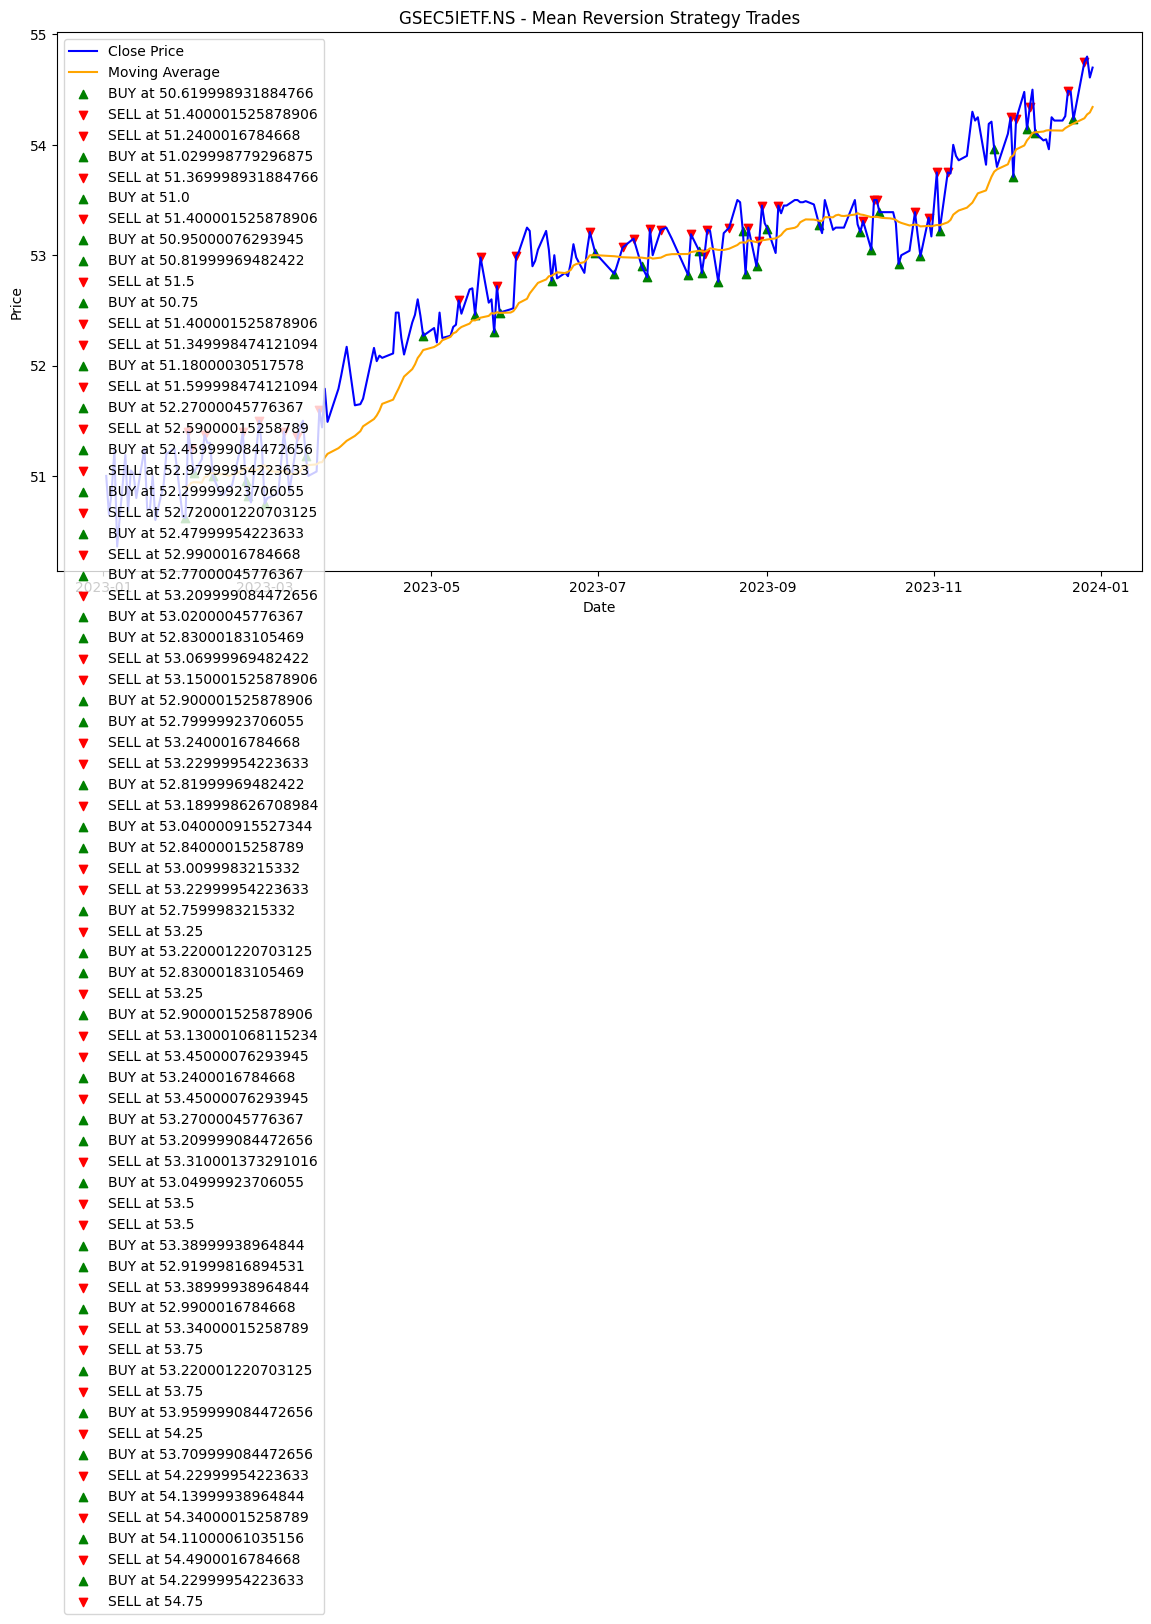

Stock: GSEC5IETF.NS
Initial Capital: 100000
Final Value: 121437.79846191406
Total Return: 21.44%
Total Profit: 21437.80


Total Initial Capital: 100000
Total Final Value: 121437.79846191406
Overall Total Return: 21.44%
Overall Total Profit: 21437.80


In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to fetch stock data
def fetch_stock_data(symbols, start_date='2023-01-01', end_date='2024-01-01'):
    all_data = {}
    for symbol in symbols:
        try:
            data = yf.download(f"{symbol}", start=start_date, end=end_date)
            if data.empty:
                raise ValueError(f"No data found for symbol: {symbol}")
            all_data[symbol] = data
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
    
    return all_data

# Function to calculate moving average and standard deviation
def calculate_moving_average_std(stock_data, window=20):
    stock_data['mean'] = stock_data['Close'].rolling(window=window).mean()
    stock_data['std'] = stock_data['Close'].rolling(window=window).std()
    return stock_data

# Function to simulate mean reversion trades
def simulate_mean_reversion(stock_data, entry_threshold=1.0, exit_threshold=0.5, initial_capital=100000):
    capital = initial_capital
    positions = 0  # Initial number of shares
    trades = []
    total_profit = 0

    for date, row in stock_data.iterrows():
        if positions == 0:  # No current position
            if row['Close'] < (row['mean'] - entry_threshold * row['std']):  # Buy signal
                buy_price = row['Close']
                shares = capital // buy_price
                capital -= shares * buy_price
                positions += shares
                trades.append((date, 'BUY', buy_price, shares))
            elif row['Close'] > (row['mean'] + entry_threshold * row['std']):  # Sell signal
                sell_price = row['Close']
                shares = capital // sell_price
                capital += shares * sell_price
                positions -= shares
                trades.append((date, 'SELL', sell_price, shares))
        elif positions > 0:  # Long position
            if row['Close'] >= (row['mean'] - exit_threshold * row['std']):  # Exit long position
                sell_price = row['Close']
                capital += positions * sell_price
                profit = positions * (sell_price - buy_price)
                total_profit += profit
                positions = 0
                trades.append((date, 'SELL', sell_price, positions))
        elif positions < 0:  # Short position
            if row['Close'] <= (row['mean'] + exit_threshold * row['std']):  # Exit short position
                buy_price = row['Close']
                capital -= abs(positions) * buy_price
                profit = abs(positions) * (sell_price - buy_price)
                total_profit += profit
                positions = 0
                trades.append((date, 'BUY', buy_price, positions))

    # Final calculation for any remaining position
    if positions != 0:
        final_price = stock_data['Close'].iloc[-1]
        if positions > 0:
            capital += positions * final_price
            profit = positions * (final_price - buy_price)
        elif positions < 0:
            capital -= abs(positions) * final_price
            profit = abs(positions) * (sell_price - final_price)
        total_profit += profit

    final_value = capital
    total_return = (final_value - initial_capital) / initial_capital

    return trades, final_value, total_return, total_profit

# Function to plot trades
def plot_trades(stock_data, trades, stock_name):
    plt.figure(figsize=(14, 7))
    
    # Plotting close price and moving average
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
    plt.plot(stock_data.index, stock_data['mean'], label='Moving Average', color='orange')
    
    # Plotting buy and sell signals
    for trade in trades:
        date, action, price, shares = trade
        color = 'green' if action == 'BUY' else 'red'
        marker = '^' if action == 'BUY' else 'v'
        plt.scatter(date, price, color=color, marker=marker, label=f'{action} at {price}')
    
    plt.title(f'{stock_name} - Mean Reversion Strategy Trades')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example usage with mean reverting stocks


data = fetch_stock_data(mean_reverting_stocks_final)

# Define thresholds
entry_threshold = 1.0
exit_threshold = 0.5

# Process each stock and simulate trades
results = {}
initial_capital_per_stock = 100000
total_initial_capital = initial_capital_per_stock * len(mean_reverting_stocks_final)
total_final_value = 0

for stock in mean_reverting_stocks_final:
    stock_data = data[stock]
    stock_data = calculate_moving_average_std(stock_data)
    trades, final_value, total_return, total_profit = simulate_mean_reversion(stock_data, entry_threshold, exit_threshold, initial_capital_per_stock)
    results[stock] = {
        'trades': trades,
        'final_value': final_value,
        'total_return': total_return,
        'total_profit': total_profit
    }
    total_final_value += final_value
    
    # Plot trades
    plot_trades(stock_data, trades, stock)

# Print individual results
for stock, result in results.items():
    print(f"Stock: {stock}")
    print(f"Initial Capital: {initial_capital_per_stock}")
    print(f"Final Value: {result['final_value']}")
    print(f"Total Return: {result['total_return'] * 100:.2f}%")
    print(f"Total Profit: {result['total_profit']:.2f}")
    print("\n")

# Print overall results
total_return_overall = (total_final_value - total_initial_capital) / total_initial_capital
total_profit_overall = total_final_value - total_initial_capital

print(f"Total Initial Capital: {total_initial_capital}")
print(f"Total Final Value: {total_final_value}")
print(f"Overall Total Return: {total_return_overall * 100:.2f}%")
print(f"Overall Total Profit: {total_profit_overall:.2f}")


selecting less risky stocks

In [69]:
import yfinance as yf
import pandas as pd

# Define your thresholds
NSE_VOLUME_THRESHOLD = 100000  # Adjusted for NSE (lower than NYSE)
PRICE_THRESHOLD = 500  # We keep the price threshold same
VOLATILITY_INDEX_THRESHOLD = 0.02  # Example volatility threshold

# Load the list of all tradable companies on NSE
nse_symbols = pd.read_csv("nifty_500.csv")
nse_symbols = nse_symbols['Symbol'].tolist()

def calculate_volatility(prices):
    return max(prices) - min(prices)

def filter_stocks(symbols):
    selected_stocks = []
    for symbol in symbols:
        symbol = f'{symbol}.NS'  # Append the NSE suffix
        try:
            data = yf.download(symbol, start='2022-01-01', end='2023-01-01')
            if data.empty:
                continue

            volumes = data['Volume']
            closing_prices = data['Close']

            avg_volume = volumes.mean()
            avg_price = closing_prices.mean()
            volatility = calculate_volatility(closing_prices) / avg_price

            if avg_volume > NSE_VOLUME_THRESHOLD and avg_price > PRICE_THRESHOLD and volatility > VOLATILITY_INDEX_THRESHOLD:
                selected_stocks.append(symbol)
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
            continue

    return selected_stocks

if __name__ == "__main__":
    selected_stocks2 = filter_stocks(nse_symbols)
    print(len(selected_stocks2))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ADANITRANS.NS']: YFTzMissingError('$%ticker%: possibly delisted; No timezone foun

$TATACOFFEE.NS: possibly delisted; No price data found  (1d 2022-01-01 -> 2023-01-01)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TATASTLLP.NS']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 comple

199


In [70]:
# Remove '.NS' from each symbol
selected_stocks2 = [symbol.replace('.NS', '') for symbol in selected_stocks2]
# Add '.NS' to each symbol
selected_stocks2 = [symbol + '.NS' for symbol in selected_stocks2]
# Print the first 10 symbols and the total count
print(selected_stocks2[:10])  # Printing the first 10 symbols
print(len(selected_stocks2))  # Printing the total count of symbols

['AAVAS.NS', 'ABB.NS', 'ACC.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'AFFLE.NS', 'AJANTPHARM.NS', 'ALKEM.NS', 'ANGELONE.NS']
199


nifty50 stocks

In [2]:
import pandas as pd
# Load the list of all tradable companies on NSE
nifty500_symbols = pd.read_csv("nifty_500.csv")
nifty500_symbols = nifty500_symbols['Symbol'].tolist()
# Remove '.NS' from each symbol
selected_stocksnifty500 = [symbol.replace('.NS', '') for symbol in nifty500_symbols]
selected_stocksnifty500 = [symbol + '.NS' for symbol in nifty500_symbols]
print(selected_stocksnifty500[:10])

['3MINDIA.NS', 'AARTIDRUGS.NS', 'AAVAS.NS', 'ABB.NS', 'ABBOTINDIA.NS', 'ABCAPITAL.NS', 'ABFRL.NS', 'ABSLAMC.NS', 'ACC.NS', 'ADANIENT.NS']


In [3]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

def get_day_data(symbol, str_date, end_date):
    # Fetch historical data using yfinance
    data = yf.download(symbol, start=str_date, end=end_date, interval='1d')
    # Reset the index to get 'Date' as a column
    data.reset_index(inplace=True)
    # Select only the 'Date', 'Open', 'Close', 'Low', 'High' columns
    df_selected = data[['Date', 'Open', 'Close', 'Low', 'High']]
    return df_selected

def calculate_averages2(symbol, date, window=8):
    end_date = datetime.strptime(date, '%Y-%m-%d')
    start_date = end_date - timedelta(days=window)
    data = get_day_data(symbol, start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))
    data['High'] = data['High'].astype(float)
    data['Low'] = data['Low'].astype(float)
    data['Close'] = data['Close'].astype(float)
    avg_high = data['High'].mean()
    avg_low = data['Low'].mean()
    avg_price = data['Close'].mean()
    return avg_high, avg_low, avg_price

# Function to find stocks with low-high difference within 1.5% of average price
def find_stocks_with_wide_range(symbols, date, window=30, threshold=0.015):
    selected_stocks = []

    for symbol in symbols:
        avg_high, avg_low, avg_price = calculate_averages2(symbol, date, window)
        if avg_price == 0:
            continue
        
        price_range = avg_high - avg_low
        price_range_percentage = (price_range / avg_price) * 100
        if price_range >= threshold * avg_price:
            selected_stocks.append((symbol, avg_low, avg_high, avg_price, price_range, price_range_percentage))

    # Sort selected stocks by price range percentage
    selected_stocks.sort(key=lambda x: x[5])

    return selected_stocks

# Assuming symbols and selected_stocksnifty500 are defined appropriately
symbols = selected_stocksnifty500  # Replace with your list of symbols

# Find stocks with wide range
wide_range_stocks = find_stocks_with_wide_range(symbols, date='2021-04-30')

# Display selected stocks7
print("Selected Stocks with Wide Price Range:")
for stock in wide_range_stocks:
    symbol, avg_low, avg_high, avg_price, price_range, price_range_percentage = stock
    print(f"Stock: {symbol}")
    print(f"  Average Low: {avg_low:.2f}")
    print(f"  Average High: {avg_high:.2f}")
    print(f"  Average Price: {avg_price:.2f}")
    print(f"  Price Range: {price_range:.2f} ({price_range_percentage:.2f}%)")
    print("\n")
sss= wide_range_stocks[-3:]
for stock in sss:
    symbol, avg_low, avg_high, avg_price, price_range, price_range_percentage = stock
    print(f"Stock: {symbol}")
    print(f"  Average Low: {avg_low:.2f}")
    print(f"  Average High: {avg_high:.2f}")
    print(f"  Average Price: {avg_price:.2f}")
    print(f"  Price Range: {price_range:.2f} ({price_range_percentage:.2f}%)")
    print("\n")

[*********************100%%**********************]  1 of 1 completed
C:\Users\iamha\AppData\Local\Temp\ipykernel_4508\4008729273.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['High'] = data['High'].astype(float)
C:\Users\iamha\AppData\Local\Temp\ipykernel_4508\4008729273.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Low'] = data['Low'].astype(float)
C:\Users\iamha\AppData\Local\Temp\ipykernel_4508\4008729273.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

$TATACOFFEE.NS: possibly delisted; No price data found  (1d 2021-03-31 -> 2021-04-30)



C:\Users\iamha\AppData\Local\Temp\ipykernel_4508\4008729273.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['High'] = data['High'].astype(float)
C:\Users\iamha\AppData\Local\Temp\ipykernel_4508\4008729273.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Low'] = data['Low'].astype(float)
C:\Users\iamha\AppData\Local\Temp\ipykernel_4508\4008729273.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Selected Stocks with Wide Price Range:
Stock: SANOFI.NS
  Average Low: 7792.42
  Average High: 7927.00
  Average Price: 7841.10
  Price Range: 134.59 (1.72%)


Stock: ABBOTINDIA.NS
  Average Low: 14909.27
  Average High: 15179.32
  Average Price: 15048.45
  Price Range: 270.05 (1.79%)


Stock: TATAINVEST.NS
  Average Low: 1006.70
  Average High: 1025.39
  Average Price: 1015.47
  Price Range: 18.69 (1.84%)


Stock: ITC.NS
  Average Low: 207.48
  Average High: 211.40
  Average Price: 209.13
  Price Range: 3.92 (1.87%)


Stock: COLPAL.NS
  Average Low: 1529.83
  Average High: 1559.82
  Average Price: 1540.94
  Price Range: 29.98 (1.95%)


Stock: RELIANCE.NS
  Average Low: 1794.84
  Average High: 1830.38
  Average Price: 1810.68
  Price Range: 35.54 (1.96%)


Stock: IOC.NS
  Average Low: 59.34
  Average High: 60.52
  Average Price: 59.91
  Price Range: 1.18 (1.96%)


Stock: DABUR.NS
  Average Low: 548.92
  Average High: 559.84
  Average Price: 553.97
  Price Range: 10.92 (1.97%)


Stock: 


C:\Users\iamha\AppData\Local\Temp\ipykernel_4508\4008729273.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['High'] = data['High'].astype(float)
C:\Users\iamha\AppData\Local\Temp\ipykernel_4508\4008729273.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Low'] = data['Low'].astype(float)
C:\Users\iamha\AppData\Local\Temp\ipykernel_4508\4008729273.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

## finding stocks for intraday strategy1

In [16]:
sss= wide_range_stocks[-3:]
for stock in sss:
    symbol, avg_low, avg_high, avg_price, price_range, price_range_percentage = stock
    print(f"Stock: {symbol}")
    print(f"  Average Low: {avg_low:.2f}")
    print(f"  Average High: {avg_high:.2f}")
    print(f"  Average Price: {avg_price:.2f}")
    print(f"  Price Range: {price_range:.2f} ({price_range_percentage:.2f}%)")
    print("\n")

Stock: EASEMYTRIP.NS
  Average Low: 23.42
  Average High: 25.27
  Average Price: 24.36
  Price Range: 1.85 (7.59%)


Stock: KIMS.NS
  Average Low: 957.50
  Average High: 1036.00
  Average Price: 982.93
  Price Range: 78.50 (7.99%)


Stock: SONACOMS.NS
  Average Low: 332.15
  Average High: 372.20
  Average Price: 355.63
  Price Range: 40.05 (11.26%)




In [17]:
print(sss)

[('EASEMYTRIP.NS', 23.420596382834695, 25.270170385187324, 24.35838049108332, 1.8495740023526288, 7.593173130002167), ('KIMS.NS', 957.5, 1036.0, 982.9250183105469, 78.5, 7.986367071511307), ('SONACOMS.NS', 332.1500015258789, 372.2000045776367, 355.62500762939453, 40.05000305175781, 11.261863533932038)]


In [4]:
from breeze_connect import BreezeConnect
import urllib
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Initialize SDK
api_key = "747QS5711RP3#8YK69T038109f3638Y2"
breeze = BreezeConnect(api_key=api_key)

# Obtain your session key URL
login_url = "https://api.icicidirect.com/apiuser/login?api_key=" + urllib.parse.quote_plus(api_key)
print(login_url)

# Generate Session
api_secret = "@e6T448hRz&7576910$1t6zC37602b52"
session_token = "45500902"
breeze.generate_session(api_secret=api_secret, session_token=session_token)

# # Fetch historical data
# h_data = breeze.get_historical_data(
#     interval="5minute",
#     from_date="2021-06-30T07:00:00.000Z",
#     to_date="2021-06-30T07:00:00.000Z",
#     stock_code="SONBLW",
#     exchange_code="NSE",
#     product_type="cash"
# )
# start_date = '2024-06-01'
# end_date = '2024-06-01'
# date_range = pd.date_range(start=start_date, end=end_date)
# date_range = pd.date_range(start=start_date, end=end_date)

h_data = breeze.get_historical_data(interval="5minute",
                        from_date= "2021-05-01T07:00:00.000Z",
                        to_date= "2021-06-01T07:00:00.000Z",
                        stock_code="HEG",
                        exchange_code="NSE",
                        product_type="cash")
# Convert historical data to DataFrame
df = pd.DataFrame(h_data['Success'])
# Select only the 'time', 'open', and 'close' columns
#df_selected = df[['datetime', 'open', 'close','low', 'high']]
# Function to calculate average high and low
#date_str = date_range.strftime('%Y-%m-%d') + 'T07:00:00.000Z'
#print(date_str)
#symbols = "ITC"
# print(h_data)
# Convert historical data to DataFrame
#df = pd.DataFrame(h_data['Success'])
#print(df)
# Select only the 'time', 'open', and 'close' columns
df_selected2 = df[['datetime', 'open', 'close']]
# df_selected2 = get_day_per5min_data()
df_selected2

https://api.icicidirect.com/apiuser/login?api_key=747QS5711RP3%238YK69T038109f3638Y2


,datetime,open,close
0,2021-05-03 09:10:00,2279,2279
1,2021-05-03 09:15:00,2278.75,2274.65
2,2021-05-03 09:20:00,2274.95,2288
3,2021-05-03 09:25:00,2286.05,2302
4,2021-05-03 09:30:00,2301.85,2311
...,...,...,...
1706,2021-06-01 15:40:00,2081.95,2081.95
1707,2021-06-01 15:45:00,2081.95,2081.95
1708,2021-06-01 15:50:00,2081.95,2081.95
1709,2021-06-01 15:55:00,2081.95,2081.95


In [21]:
h_data

{'Success': '',
 'Status': 500,
 'Error': "Interval should be either '1minute', '5minute', '30minute', or '1day'"}

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df_selected2 = pd.read_csv('df_total_sonblw.csv')

# Display the first few rows of the DataFrame
print(df_selected2.head())


              datetime    open   close
0  2024-06-10 09:15:00  430.00  431.05
1  2024-06-10 09:20:00  431.55  435.85
2  2024-06-10 09:25:00  436.50  439.05
3  2024-06-10 09:30:00  439.00  436.45
4  2024-06-10 09:35:00  436.05  433.80


In [5]:
df_total = df_selected2.copy()

In [6]:
# Assuming df_selected2 is your DataFrame
df_total.to_csv('df_total_HEG.csv', index=False)


In [7]:
df_total

,datetime,open,close
0,2021-05-03 09:10:00,2279,2279
1,2021-05-03 09:15:00,2278.75,2274.65
2,2021-05-03 09:20:00,2274.95,2288
3,2021-05-03 09:25:00,2286.05,2302
4,2021-05-03 09:30:00,2301.85,2311
...,...,...,...
1706,2021-06-01 15:40:00,2081.95,2081.95
1707,2021-06-01 15:45:00,2081.95,2081.95
1708,2021-06-01 15:50:00,2081.95,2081.95
1709,2021-06-01 15:55:00,2081.95,2081.95


In [9]:
df_selected2['datetime'] = pd.to_datetime(df_selected2['datetime'])

# Grouping by the date part of 'datetime'
dfs = {}
for date, group in df_selected2.groupby(df_selected2['datetime'].dt.date):
    df_name = f'df_selected_{date}'
    dfs[df_name] = group.reset_index(drop=True)
    globals()[df_name] = group.reset_index(drop=True)

# Now you can access the new DataFrames, for example:
print(dfs['df_selected_2021-05-17'])
print(dfs['df_selected_2021-05-19'])

              datetime     open    close
0  2021-05-17 09:10:00     2130     2130
1  2021-05-17 09:15:00   2130.3   2128.9
2  2021-05-17 09:20:00  2124.05   2089.2
3  2021-05-17 09:25:00  2087.15     2105
4  2021-05-17 09:30:00  2104.05  2097.95
..                 ...      ...      ...
75 2021-05-17 15:25:00  2219.05  2216.95
76 2021-05-17 15:30:00     2216  2223.15
77 2021-05-17 15:40:00  2223.15  2223.15
78 2021-05-17 15:45:00  2223.15  2223.15
79 2021-05-17 15:55:00  2223.15  2223.15

[80 rows x 3 columns]
              datetime     open    close
0  2021-05-19 09:10:00   2226.9   2226.9
1  2021-05-19 09:15:00   2222.5  2211.65
2  2021-05-19 09:20:00  2215.15     2223
3  2021-05-19 09:25:00   2224.1  2226.05
4  2021-05-19 09:30:00     2226     2240
..                 ...      ...      ...
77 2021-05-19 15:40:00  2184.75  2184.75
78 2021-05-19 15:45:00  2184.75  2184.75
79 2021-05-19 15:50:00  2184.75  2184.75
80 2021-05-19 15:55:00  2184.75  2184.75
81 2021-05-19 16:00:00  2184.75  2

C:\Users\iamha\AppData\Local\Temp\ipykernel_4508\3173333571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected2['datetime'] = pd.to_datetime(df_selected2['datetime'])


In [10]:
print(len(dfs))

21


In [32]:
# Print all the keys in the dfs dictionary
print(dfs.keys())

# If you want to print the keys in a more readable format
for key in dfs.keys():
    print(key)


dict_keys(['df_selected_2021-05-03', 'df_selected_2021-05-04', 'df_selected_2021-05-05', 'df_selected_2021-05-06', 'df_selected_2021-05-07', 'df_selected_2021-05-10', 'df_selected_2021-05-11', 'df_selected_2021-05-12', 'df_selected_2021-05-14', 'df_selected_2021-05-17', 'df_selected_2021-05-18', 'df_selected_2021-05-19', 'df_selected_2021-05-20', 'df_selected_2021-05-21', 'df_selected_2021-05-24', 'df_selected_2021-05-25', 'df_selected_2021-05-26', 'df_selected_2021-05-27', 'df_selected_2021-05-28', 'df_selected_2021-05-31', 'df_selected_2021-06-01'])
df_selected_2021-05-03
df_selected_2021-05-04
df_selected_2021-05-05
df_selected_2021-05-06
df_selected_2021-05-07
df_selected_2021-05-10
df_selected_2021-05-11
df_selected_2021-05-12
df_selected_2021-05-14
df_selected_2021-05-17
df_selected_2021-05-18
df_selected_2021-05-19
df_selected_2021-05-20
df_selected_2021-05-21
df_selected_2021-05-24
df_selected_2021-05-25
df_selected_2021-05-26
df_selected_2021-05-27
df_selected_2021-05-28
df_se

In [39]:
start_date = '2021-05-01'
end_date = '2021-06-01'
# Extract keys from the dfs dictionary
dfs_keys = list(dfs.keys())

# Convert dfs keys to dates
available_dates = [key.split('_')[-1] for key in dfs_keys]

# Create a filtered date range based on available dates
filtered_date_range = [date for date in pd.date_range(start=start_date, end=end_date) if date.strftime('%Y-%m-%d') in available_dates]

# Print the filtered date range
print(filtered_date_range)

[Timestamp('2021-05-03 00:00:00'), Timestamp('2021-05-04 00:00:00'), Timestamp('2021-05-05 00:00:00'), Timestamp('2021-05-06 00:00:00'), Timestamp('2021-05-07 00:00:00'), Timestamp('2021-05-10 00:00:00'), Timestamp('2021-05-11 00:00:00'), Timestamp('2021-05-12 00:00:00'), Timestamp('2021-05-14 00:00:00'), Timestamp('2021-05-17 00:00:00'), Timestamp('2021-05-18 00:00:00'), Timestamp('2021-05-19 00:00:00'), Timestamp('2021-05-20 00:00:00'), Timestamp('2021-05-21 00:00:00'), Timestamp('2021-05-24 00:00:00'), Timestamp('2021-05-25 00:00:00'), Timestamp('2021-05-26 00:00:00'), Timestamp('2021-05-27 00:00:00'), Timestamp('2021-05-28 00:00:00'), Timestamp('2021-05-31 00:00:00'), Timestamp('2021-06-01 00:00:00')]


In [33]:
# Define the date range and selected stock symbols
start_date = '2021-05-01'
end_date = '2021-06-01'
symbols = ["ADAGRE"]  # Replace with your list of stock symbols

# Assuming dfs dictionary is already populated with date-specific DataFrames
# Example keys in dfs
dfs_keys = [
    'df_selected_2021-05-03', 'df_selected_2021-05-04', 'df_selected_2021-05-05',
    'df_selected_2021-05-06', 'df_selected_2021-05-07', 'df_selected_2021-05-10',
    'df_selected_2021-05-11', 'df_selected_2021-05-12', 'df_selected_2021-05-14',
    'df_selected_2021-05-17', 'df_selected_2021-05-18', 'df_selected_2021-05-19',
    'df_selected_2021-05-20', 'df_selected_2021-05-21', 'df_selected_2021-05-24',
    'df_selected_2021-05-25', 'df_selected_2021-05-26', 'df_selected_2021-05-27', 
    'df_selected_2021-05-28', 'df_selected_2021-05-31', 'df_selected_2021-06-01'
]

# Convert dfs keys to dates
available_dates = [key.split('_')[-1] for key in dfs_keys]

# Create a filtered date range based on available dates
filtered_date_range = [date for date in pd.date_range(start=start_date, end=end_date) if date.strftime('%Y-%m-%d') in available_dates]

# Print the filtered date range
print(filtered_date_range)


[Timestamp('2021-05-03 00:00:00'), Timestamp('2021-05-04 00:00:00'), Timestamp('2021-05-05 00:00:00'), Timestamp('2021-05-06 00:00:00'), Timestamp('2021-05-07 00:00:00'), Timestamp('2021-05-10 00:00:00'), Timestamp('2021-05-11 00:00:00'), Timestamp('2021-05-12 00:00:00'), Timestamp('2021-05-14 00:00:00'), Timestamp('2021-05-17 00:00:00'), Timestamp('2021-05-18 00:00:00'), Timestamp('2021-05-19 00:00:00'), Timestamp('2021-05-20 00:00:00'), Timestamp('2021-05-21 00:00:00'), Timestamp('2021-05-24 00:00:00'), Timestamp('2021-05-25 00:00:00'), Timestamp('2021-05-26 00:00:00'), Timestamp('2021-05-27 00:00:00'), Timestamp('2021-05-28 00:00:00'), Timestamp('2021-05-31 00:00:00'), Timestamp('2021-06-01 00:00:00')]


https://api.icicidirect.com/apiuser/login?api_key=747QS5711RP3%238YK69T038109f3638Y2
2021-05-03T07:00:00.000Z
 
2302.233333333333   2193.1333333333337
Day High: 2335, Day Low: 2261
 
2021-05-04T07:00:00.000Z
 
2331.2000000000003   2228.35
Day High: 2375, Day Low: 2215.5
long bought at  2222.15
closing =  2222.15
 
closing =  2222.15
long sell at  2235.0
 
 
2021-05-05T07:00:00.000Z
 
2356.3333333333335   2236.1833333333334
Day High: 2268.7, Day Low: 2185
long bought at  2234.85
closing =  2234.85
 
 
2021-05-06T07:00:00.000Z
 
2326.233333333333   2220.5
Day High: 2252.85, Day Low: 2190
closing =  2234.85
long sell at  2251.0
 
long bought at  2213.0
closing =  2213.0
 
closing =  2213.0
long sell at  2221.4
 
long bought at  2220.25
closing =  2220.25
 
 
2021-05-07T07:00:00.000Z
 
2307.8875   2212.875
Day High: 2310, Day Low: 2220.65
closing =  2220.25
long sell at  2227.9
 
 
2021-05-10T07:00:00.000Z
 
2277.183333333333   2198.5499999999997
Day High: 2352, Day Low: 2291
 
2021-05-11T

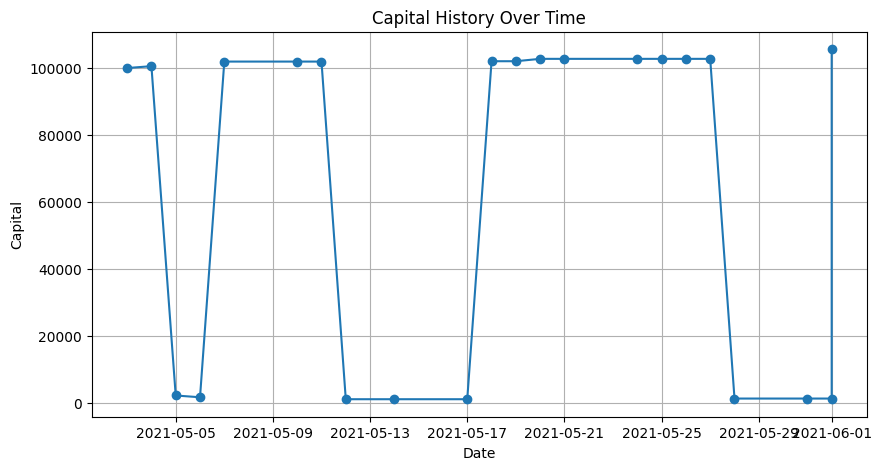

In [44]:
import yfinance as yf
from breeze_connect import BreezeConnect  # Assuming you have a Breeze API client library
from datetime import datetime, timedelta
import pandas as pd
import urllib
import matplotlib.pyplot as plt

# Define the date range and selected stock symbols
start_date = '2021-05-01'
end_date = '2021-06-01'
symbols = ["ADAGRE"]  # Replace with your list of stock symbols

# Initialize SDK
api_key = "747QS5711RP3#8YK69T038109f3638Y2"
breeze = BreezeConnect(api_key=api_key)

# Obtain your session key URL
login_url = "https://api.icicidirect.com/apiuser/login?api_key=" + urllib.parse.quote_plus(api_key)
print(login_url)

# Generate Session
api_secret = "@e6T448hRz&7576910$1t6zC37602b52"
session_token = "45512657"
breeze.generate_session(api_secret=api_secret, session_token=session_token)

def get_day_data(symbol, str_date, end_date):
    h_data = breeze.get_historical_data(interval="1day",
                                        from_date=str_date,
                                        to_date=end_date,
                                        stock_code=symbol,
                                        exchange_code="NSE",
                                        product_type="cash")
    # Convert historical data to DataFrame
    df = pd.DataFrame(h_data['Success'])
    # Select only the 'datetime', 'open', 'close', 'low', 'high' columns
    df_selected = df[['datetime', 'open', 'close', 'low', 'high']]
    return df_selected

def calculate_avg_high_low(symbol, date, window=5):
    end_date = datetime.strptime(date, '%Y-%m-%d')
    start_date = end_date - timedelta(days=window)
    data = get_day_data(symbol, start_date.strftime('%Y-%m-%d') + 'T07:00:00.000Z',
                        (end_date - timedelta(days=1)).strftime('%Y-%m-%d') + 'T07:00:00.000Z')
    data['high'] = data['high'].astype(float)
    data['low'] = data['low'].astype(float)
    
    avg_high = data['high'].mean()
    avg_low = data['low'].mean()
    return avg_high, avg_low

# Initialize capital history list
capital_history = []

# Main loop for each symbol
for symbol in symbols:
    capital = 100000
    total_return = 0
    position = 0  # No shares bought
    shares = 0  # Number of shares held
    capital_initial = capital
    closing = 0
    dd = 0
    count = 0
    d = filtered_date_range[0]
 
    # Convert dfs keys to dates
    dfs_keys = list(dfs.keys())
    available_dates = [key.split('_')[-1] for key in dfs_keys]
    filtered_date_range = [date for date in pd.date_range(start=start_date, end=end_date) if date.strftime('%Y-%m-%d') in available_dates]
    
    for date in filtered_date_range:
        d = date
        date_str2 = date.strftime('%Y-%m-%d')
        date_str = date.strftime('%Y-%m-%d') + 'T07:00:00.000Z'
        print(date_str)
        print(" ")
        capital_initial = capital

        # Calculate average high and low
        avg_high, avg_low = calculate_avg_high_low(symbol, date_str2)
        avg_high2, avg_low2 = calculate_avg_high_low(symbol, date_str2, 8)
        print(avg_high, " ", avg_low)
        
        day_data = get_day_data(symbol, date_str, date_str)
        print(f"Day High: {day_data['high'].values[0]}, Day Low: {day_data['low'].values[0]}")
    
        df_selected3 = dfs[f'df_selected_{date_str2}']
        dd = df_selected3.iloc[-1]['close']
        
        for index, row in df_selected3.iterrows():
            close_price = float(row['close'])
            if close_price <= avg_low and position == 0:
                # Buy shares
                shares = capital // close_price
                position = 1
                capital -= shares * close_price
                closing = close_price
                count += 1
                print("long bought at ", close_price)
                print("closing = ", closing)
                print(" ")
            
            if close_price > closing and position == 1:
                # Sell shares
                print("closing = ", closing)
                capital += shares * close_price
                if shares * close_price < 800:
                    capital -= 0.0004 * (shares * close_price)
                else:
                    capital -= 20
                position = 0
                shares = 0
                print("long sell at ", close_price)
                print(" ")
        # Calculate daily return
        date_return = capital - capital_initial
        total_return += date_return
        capital_history.append((date, capital))  # Store the capital for each day
        print(" ")
    if position ==1 :
        print("closing at month end when price breakeven for previous buy = ", closing)
        capital += shares * closing
        if shares * closing < 800:
            capital -= 0.0004 * (shares * closing)
        else:
            capital -= 20
        print('closing capital = ', capital)
        position = 0
        shares = 0
        print("long sell at month end when price breakeven for previous buy = ", closing)
        date_return = capital - capital_initial
        total_return += date_return
        capital_history.append((d, capital))  # Store the capital for each day
        print(" ")

    print(f"Total return for {symbol}: {total_return}")
    print(count)

# Plot capital history
dates, capitals = zip(*capital_history)
plt.figure(figsize=(10, 5))
plt.plot(dates, capitals, marker='o')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.title('Capital History Over Time')
plt.grid(True)
plt.show()


In [45]:
import yfinance as yf
from breeze_connect import BreezeConnect  # Assuming you have a Breeze API client library
from datetime import datetime, timedelta
import pandas as pd
import urllib

# Define the date range and selected stock symbols
start_date = '2021-05-01'
end_date = '2021-06-01'
symbols = ["HEG"]  # Replace with your list of stock symbols

# Initialize SDK
api_key = "747QS5711RP3#8YK69T038109f3638Y2"
breeze = BreezeConnect(api_key=api_key)

# Obtain your session key URL
login_url = "https://api.icicidirect.com/apiuser/login?api_key=" + urllib.parse.quote_plus(api_key)
print(login_url)

# Generate Session
api_secret = "@e6T448hRz&7576910$1t6zC37602b52"
session_token = "45512657"
breeze.generate_session(api_secret=api_secret, session_token=session_token)
def get_day_data(symbol, str_date,end_date) :
    h_data = breeze.get_historical_data(interval="1day",
                            from_date= str_date,
                            to_date= end_date,
                            stock_code=symbol,
                            exchange_code="NSE",
                            product_type="cash")
    # Convert historical data to DataFrame
    df = pd.DataFrame(h_data['Success'])
    # Select only the 'time', 'open', and 'close' columns
    df_selected = df[['datetime', 'open', 'close','low', 'high']]
    # Function to calculate average high and low
    return df_selected


def calculate_avg_high_low(symbol, date, window=5):
    end_date = datetime.strptime(date, '%Y-%m-%d')
    start_date = end_date - timedelta(days=window)
    data = get_day_data(symbol, start_date.strftime('%Y-%m-%d') + 'T07:00:00.000Z', (end_date - timedelta(days=1)).strftime('%Y-%m-%d') + 'T07:00:00.000Z')
    data['high'] = data['high'].astype(float)
    data['low'] = data['low'].astype(float)
    
    avg_high = data['high'].mean()
    avg_low = data['low'].mean()
    return avg_high, avg_low

# Main loop for each symbol
for symbol in symbols:
    capital = 100000

    total_return = 0

    position = 0  # No shares bought

    shares = 0  # Number of shares held

    capital_initial = capital

    closing=0
    flag = False
    dd = 0
    day =0
    date_range = pd.date_range(start=start_date, end=end_date)
    for date in filtered_date_range:
        
        date_str2 = date.strftime('%Y-%m-%d')
        date_str = date.strftime('%Y-%m-%d') + 'T07:00:00.000Z'
        print(date_str)
        print(" ")

        # Calculate average high and low
        avg_high, avg_low = calculate_avg_high_low(symbol, date_str2)
        avg_high2, avg_low2 = calculate_avg_high_low(symbol, date_str2, 8)
        print(avg_high," ",avg_low)
        
        day_data = get_day_data(symbol, date_str, date_str)
        print(f"Day High: {day_data['high'].values[0]}, Day Low: {day_data['low'].values[0]}")
    
        # Intraday trading logic
        # closing=avg_low
        closing_short = avg_high2
        # position = 0  # No shares bought

        # shares = 0  # Number of shares held

        capital_initial = capital
 
        df_selected3 = dfs[f'df_selected_{date_str2}']
        dd= df_selected3.iloc[-1]['close']
        for index, row in df_selected3.iterrows():
            close_price = float(row['close'])
#long shorts           
            if close_price <= avg_low and position == 0 and day ==0:
                # Buy shares
                day +=1
                flag = True
                shares = capital // close_price
                position = 1
                capital -= shares * close_price
                closing = close_price
                print("long bought at ",close_price)
                print("closing = ", closing)
                print(" ")

#close_price >= avg_high*0.9 and
# close_price >= closing+1 and
            # if avg_high>closing :
            #     closing = avg_high            
            if  close_price > closing and position == 1 and day == 3:
                # Sell shares
                print("closing = ", closing)
                capital += shares * close_price
                if shares * close_price < 800:
                    capital -= 0.0004*(shares * close_price)
                else :
                    capital -= 20
                position = 0
                shares = 0
                day =0
                flag = False
                print("long sell at ",close_price)
                print(" ")

            if close_price < ((closing-100)) and position == 1 and day ==3 :
                print("closing at stoploss = ", close_price)
                capital += shares * close_price
                if shares * close_price < 800:
                    capital -= 0.0004*(shares * close_price)
                else :
                    capital -= 20
                position = 0
                shares = 0
                day = 0
                print(" ")
    print(" ")
    if(flag):
        day +=1

        # Calculate daily return
    date_return = capital - capital_initial  # Assuming we start with $10,000 each day
    total_return += date_return
    capital = capital   # Reset capital for the next day

    print(f"Total return for {symbol}: {total_return}")
# Note: This code assumes you have the BreezeConnect library installed and configured.
# You'll need to replace 'YOUR_API_KEY' with your actual Breeze API key and adjust the
# 'symbols' list with your desired stock symbols.


https://api.icicidirect.com/apiuser/login?api_key=747QS5711RP3%238YK69T038109f3638Y2
2021-05-03T07:00:00.000Z
 
2302.233333333333   2193.1333333333337
Day High: 2335, Day Low: 2261
2021-05-04T07:00:00.000Z
 
2331.2000000000003   2228.35
Day High: 2375, Day Low: 2215.5
long bought at  2222.15
closing =  2222.15
 
2021-05-05T07:00:00.000Z
 
2356.3333333333335   2236.1833333333334
Day High: 2268.7, Day Low: 2185
2021-05-06T07:00:00.000Z
 
2326.233333333333   2220.5
Day High: 2252.85, Day Low: 2190
2021-05-07T07:00:00.000Z
 
2307.8875   2212.875
Day High: 2310, Day Low: 2220.65
2021-05-10T07:00:00.000Z
 
2277.183333333333   2198.5499999999997
Day High: 2352, Day Low: 2291
2021-05-11T07:00:00.000Z
 
2304.9500000000003   2233.883333333333
Day High: 2297.95, Day Low: 2232.1
2021-05-12T07:00:00.000Z
 
2319.983333333333   2247.9166666666665
Day High: 2268, Day Low: 2155.25
2021-05-14T07:00:00.000Z
 
2305.983333333333   2226.116666666667
Day High: 2205, Day Low: 2080.25
2021-05-17T07:00:00.000Z


In [28]:
import numpy as np
import pandas as pd
import yfinance as yf
from hurst import compute_Hc
import pandas as pd
from scipy.stats import norm

# Load the list of all tradable companies on NSE
nifty500_symbols = pd.read_csv("nifty_500.csv")
nifty500_symbols = nifty500_symbols['Symbol'].tolist()
selected_stocksnifty500 = [symbol.replace('.NS', '') for symbol in nifty500_symbols]
selected_stocksnifty500 = [symbol + '.NS' for symbol in nifty500_symbols]

# Load data for a list of stocks
tickers = selected_stocksnifty500
data = yf.download(tickers, start="2020-01-01", end="2024-01-01")['Adj Close']

# Define look-back period (e.g., 252 trading days ~ 1 year) and holding period
look_back_period = 252
holding_period = 20

# Calculate daily returns
returns = data.pct_change().dropna()

# Variance ratio test function
def variance_ratio(price_series, lag=2):
    price_diff = np.diff(price_series)
    n = len(price_diff)
    mu = np.mean(price_diff)
    m = (n - lag + 1) * (1 - lag / n)
    b = np.sum(np.square(price_diff))
    t = np.sum(np.square(price_diff[lag:] - price_diff[:-lag]))
    vr = (b / m) / (t / (n - lag))
    z_score = (vr - 1) / np.sqrt(2 / (n - lag))
    p_value = 2 * (1 - norm.cdf(np.abs(z_score)))
    return vr, p_value

# Identify momentum and trending stocks
trending_stocks = []
for stock in tickers:
    try:
        # Calculate Hurst exponent
        H, c, data_points = compute_Hc(data[stock].dropna(), kind='price')
        
        # Calculate variance ratio
        vr, p_value = variance_ratio(data[stock].dropna())
        
        # Define thresholds
        trending_threshold = 0.5 # for Hurst exponent
        vr_threshold = 1.0  # for variance ratio (indicates random walk)
        
        # Check for uptrend or downtrend
        if H > trending_threshold and vr > vr_threshold:
            print(f"{stock}: Uptrend detected")
            trending_stocks.append((stock, 'Uptrend'))
        elif H < trending_threshold and vr < vr_threshold:
            print(f"{stock}: Downtrend detected")
            trending_stocks.append((stock, 'Downtrend'))
        else:
            print(f"{stock}: No clear trend detected")
    except Exception as e:
        print(f"Error processing {stock}: {e}")

# Display results
print(trending_stocks)


[***                    7%%                      ]  34 of 501 completed

$TATACOFFEE.NS: possibly delisted; No price data found  (1d 2020-01-01 -> 2024-01-01)


[*********************100%%**********************]  501 of 501 completed

16 Failed downloads:
['L&TFH.NS', 'HDFC.NS', 'WELSPUNIND.NS', 'LTI.NS', 'PVR.NS', 'MINDAIND.NS', 'ADANITRANS.NS', 'MINDTREE.NS', 'SRTRANSFIN.NS', 'IIFLWAM.NS', 'MAHINDCIE.NS', 'TATASTLLP.NS', 'KALPATPOWR.NS', 'SHRIRAMCIT.NS', 'AMARAJABAT.NS']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
['TATACOFFEE.NS']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2020-01-01 -> 2024-01-01)')
C:\Users\iamha\AppData\Local\Temp\ipykernel_8020\2355172242.py:23: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


3MINDIA.NS: No clear trend detected
AARTIDRUGS.NS: No clear trend detected
AAVAS.NS: No clear trend detected
ABB.NS: No clear trend detected
ABBOTINDIA.NS: No clear trend detected
ABCAPITAL.NS: No clear trend detected
ABFRL.NS: No clear trend detected
ABSLAMC.NS: No clear trend detected
ACC.NS: No clear trend detected
ADANIENT.NS: No clear trend detected
ADANIGREEN.NS: No clear trend detected
ADANIPORTS.NS: No clear trend detected
Error processing ADANITRANS.NS: Series length must be greater or equal to 100
ADVENZYMES.NS: No clear trend detected
AEGISCHEM.NS: No clear trend detected
AFFLE.NS: No clear trend detected
AIAENG.NS: No clear trend detected
AJANTPHARM.NS: No clear trend detected
ALKEM.NS: No clear trend detected
ALKYLAMINE.NS: No clear trend detected
ALLCARGO.NS: No clear trend detected
ALOKINDS.NS: Downtrend detected
Error processing AMARAJABAT.NS: Series length must be greater or equal to 100
AMBER.NS: No clear trend detected
AMBUJACEM.NS: No clear trend detected
ANGELONE.N

In [ ]:
api_key = "747QS5711RP3#8YK69T038109f3638Y2"

api_secret = "@e6T448hRz&7576910$1t6zC37602b52"

session_token = "45528482"

